In [1]:
import os

chkpt_root = '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1'
data_files = '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-val/*'
tces_file = '../mnt/tess/astronet/tces-vetting-v02-tois_as_planets-val.csv'
file_pattern = '../mnt/tess/astronet/tfrecords-vetting-v02-tois_as_planets-val/*'

labels = ['p', 'e', 'n']

nruns = 10

def load_ensemble(chkpt_root, nruns):
    checkpts = []
    
    for i in range(nruns):
        parent = os.path.join(chkpt_root, str(i + 1))
        if not os.path.exists(parent):
            break
        all_dirs = os.listdir(parent)
        if not all_dirs:
            break
        d, = all_dirs
        checkpts.append(os.path.join(parent, d))
    return checkpts

paths = load_ensemble(chkpt_root, nruns)
paths

['../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/1/AstroCNNModelVetting_base_new_20240210_075450',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/2/AstroCNNModelVetting_base_new_20240210_075714',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/3/AstroCNNModelVetting_base_new_20240210_075958',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/4/AstroCNNModelVetting_base_new_20240210_080249',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/5/AstroCNNModelVetting_base_new_20240210_080544',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/6/AstroCNNModelVetting_base_new_20240210_080812',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/7/AstroCNNModelVetting_base_new_20240210_081032',
 '../mnt/tess/astronet/checkpoints/vetting-v02-tois_as_planets_base_new_1/8/AstroCNNModelVetting_base_new_20240210_081257',
 '../mnt

In [2]:
import getpass
import os
from astronet import predict
import tensorflow as tf


def run_predictions(path):
    predict.FLAGS = predict.parser.parse_args([
      '--model_dir', path,
      '--data_files', data_files,
      '--output_file', '',
    ])

    return predict.predict()


paths = load_ensemble(chkpt_root, nruns)
ensemble_preds = []
config = None
for i, path in enumerate(paths):
    print(f'Running model {i + 1}')
    preds, config = run_predictions(path)
    ensemble_preds.append(preds.set_index('astro_id'))
    print()
  

2024-02-26 14:17:05.122816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 14:17:27.679915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Running model 1


2024-02-26 14:18:12.936663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19896 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:05:00.0, compute capability: 8.6
2024-02-26 14:18:12.938555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46672 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:06:00.0, compute capability: 8.6
2024-02-26 14:18:12.939478: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 46672 MB memory:  -> device: 2, name: NVIDIA RTX A6000, pci bus id: 0000:45:00.0, compute capability: 8.6
2024-02-26 14:18:12.940334: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 46672 MB memory:  -> device: 3, name: NVIDIA RTX A6000, pci bus id: 0000:46:00.0, 

0 records

2024-02-26 14:18:17.072975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]
2024-02-26 14:18:21.321147: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-02-26 14:18:22.013918: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


805 records
Running model 2
0 records

2024-02-26 14:18:40.310903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 3
0 records

2024-02-26 14:18:51.959013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 4
0 records

2024-02-26 14:19:04.191903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 5
0 records

2024-02-26 14:19:15.980481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 6
0 records

2024-02-26 14:19:28.080496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 7
0 records

2024-02-26 14:19:39.455906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 8
0 records

2024-02-26 14:19:51.196625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 9
0 records

2024-02-26 14:20:03.892563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records
Running model 10
0 records

2024-02-26 14:20:16.002982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


805 records


In [5]:
labels = ['disp_p', 'disp_e', 'disp_n']

col_e = labels.index('disp_e')
thresh = 0.215

In [6]:
import numpy as np
import pandas as pd

agg_preds = {}

for preds in ensemble_preds:
    for ex_id in preds.index:
        if ex_id not in agg_preds:
            agg_preds[ex_id] = []

        row = preds[preds.index == ex_id]
        pred_v = row.values[0]
        if len(row.values) > 1:
            print(f'Warning: duplicate predictions for {ex_id}')
        if pred_v[col_e] >= thresh:
            agg_preds[ex_id].append('disp_e')
        else:
            masked_v = [v if i != col_e else 0 for i, v in enumerate(pred_v)]
            agg_preds[ex_id].append(preds.columns[np.argmax(masked_v)])

In [7]:
final_preds = []
for ex_id in list(agg_preds.keys()):
    counts = {l: 0 for l in labels}
    for e in agg_preds[ex_id]:
        counts[e] += 1
    maxcount = max(counts.values())
    counts.update({
        'astro_id': ex_id,
        'maxcount': maxcount,
    })
    final_preds.append(counts)
    
final_preds = pd.DataFrame(final_preds).set_index('astro_id')

In [8]:
tce_table = pd.read_csv(tces_file, header=0, low_memory=False)
tce_table['astro_id'] = tce_table['Astro ID']
tce_table = tce_table.set_index('astro_id')
for l in labels:
    tce_table[l] = tce_table[l[:-1] + l[-1]]
tce_labels = tce_table[labels + ['TIC ID']]

pl = final_preds.join(tce_labels, on='astro_id', how='left', lsuffix='_pred')

pl.head()
pd.set_option('display.max_columns', None)

In [9]:
pl

disp_p_pred  disp_e_pred  disp_n_pred  maxcount  disp_p  disp_e  \
astro_id                                                                    
493                 0           10            0        10       0       1   
7055               10            0            0        10       1       0   
2046               10            0            0        10       0       1   
2452                3            7            0         7       0       1   
2486                0           10            0        10       0       1   
...               ...          ...          ...       ...     ...     ...   
5851               10            0            0        10       1       0   
7529               10            0            0        10       1       0   
6306               10            0            0        10       1       0   
3326                0           10            0        10       0       1   
8810               10            0            0        10       1       0   

          disp_n     TIC ID  
astro_id                     
493            0  160104585  
7055           0  281118572  
2046           0  141123393  
2452           0  239278684  
2486           0  244947717  
...          ...        ...  
5851           0  176279915  
7529           0  313194972  
6306           0  229781583  
3326           0  390262679  
8810           0  424733642  

[805 rows x 8 columns]

In [10]:
ppos = (pl['disp_e_pred'] > 0)
pos = (pl['disp_e'] > 0)

pneg = (pl['disp_e_pred'] == 0)
neg = (pl['disp_e'] == 0)

print('Recall:', len(pl[ppos & pos]) / len(pl[pos]))
print('Precision:', len(pl[ppos & pos]) / len(pl[ppos]))

Recall: 0.9736070381231672
Precision: 0.8736842105263158


In [11]:
for i in pl[pos & pneg]['TIC ID']:
    print(i)

141123393
261261490
300291839
260985864
150360010
321311495
19155785
375090559
464889047


In [12]:
for i in pl[neg & ppos]['TIC ID']:
    print(i)

88863718
139148528
257567854
47425697
117378334
250306572
347641245
145515899
149022647
141146530
20897611
84356562
261264826
1717079071
15692883
21744120
144310492
399868187
467281353
264899051
60542708
60646268
162695785
159629594
96246348
2003022879
66445643
214361331
3680800
339402691
82010075
392476080
189300053
155114483
346338553
384984325
425511696
404853708
275758701
391241402
206352378
347430350
466058558
136209118
63013648
139507260
439946040
256509900


In [13]:
def compare(ensemble_preds, filter):
    result = ensemble_preds[0][filter]
    for preds in ensemble_preds[1:]:
        result = result.append(preds[filter])
    return result

compare(ensemble_preds, preds.index == pl[pl['TIC ID'] == 142276270].index.values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
ensemble_preds[0][preds.index == pl[pl['TIC ID'] == 142276270].index.values[0]]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
pl[pl.index == pl[pl['TIC ID'] == 142276270].index.values[0]]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
tce_labels

disp_p  disp_e  disp_n     TIC ID
astro_id                                   
4462           1       0       0   55092869
983            0       1       0  303351921
5840           1       0       0  175317833
1764           0       4       0   36601157
6168           1       0       0  209459275
...          ...     ...     ...        ...
5477           1       0       0  148129139
4839           1       0       0   91697121
7743           1       0       0  332477926
7107           1       0       0  284418751
1143           0       1       0  337879997

[806 rows x 4 columns]

### PR curve

In [14]:
ids = set(ensemble_preds[0].index.values)

index = {v: i for i, v in enumerate(ids)}

pred_es = np.zeros([len(ensemble_preds), len(index)])
for i, preds in enumerate(ensemble_preds):
    for row in preds.iterrows():
        ex_id, pred_e = row[0], row[1][col_e]
        pred_es[i][index[ex_id]] = pred_e

lbl_es = np.zeros([len(index)], dtype=np.bool)
for row in tce_labels.iterrows():
    ex_id, lbl_e = row[0], row[1]['disp_e']
    try:
        lbl_es[index[ex_id]] = (lbl_e > 0)
    except Exception as e:
        print("ERROR: Did not have ID", e)
        continue

ERROR: Did not have ID 8355


/tmp/ipykernel_96255/1568690310.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lbl_es = np.zeros([len(index)], dtype=np.bool)


In [15]:
num_cond_pos = int(np.sum(lbl_es))

def pr_at_th(th):
    pred_pos = np.any(pred_es >= th, axis=0)
    true_pos = pred_pos & lbl_es
    num_pred_pos = int(np.sum(pred_pos))
    num_true_pos = int(np.sum(true_pos))
    if num_pred_pos == 0:
        return 1.0, 0.0
    return float(num_true_pos) / float(num_pred_pos), float(num_true_pos) / float(num_cond_pos)

Text(0, 0.5, 'Recall')

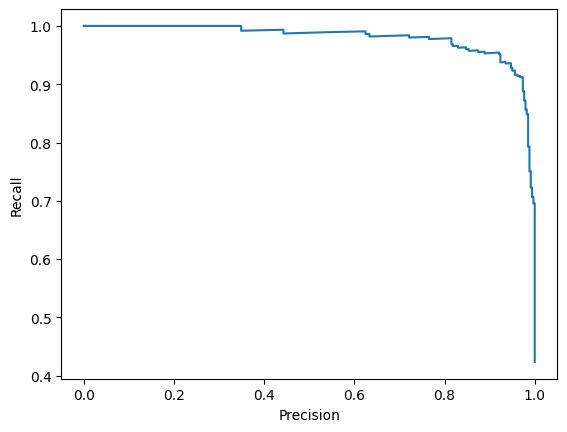

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(lbl_es, pred_es[0])

plt.plot(recall, precision)
plt.xlabel("Precision")
plt.ylabel("Recall")




In [17]:
# np.sum(ytrue, axis=1)
tce_labels.head(6) # TODO: Some objects have multiple labels or no labels - how to assess metrics?

disp_p  disp_e  disp_n     TIC ID
astro_id                                   
4462           1       0       0   55092869
983            0       1       0  303351921
5840           1       0       0  175317833
1764           0       4       0   36601157
6168           1       0       0  209459275
69             0       1       0  118389230

ERROR: No object. 8355


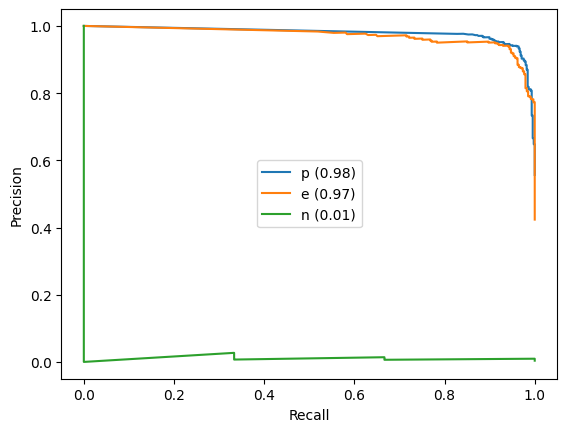

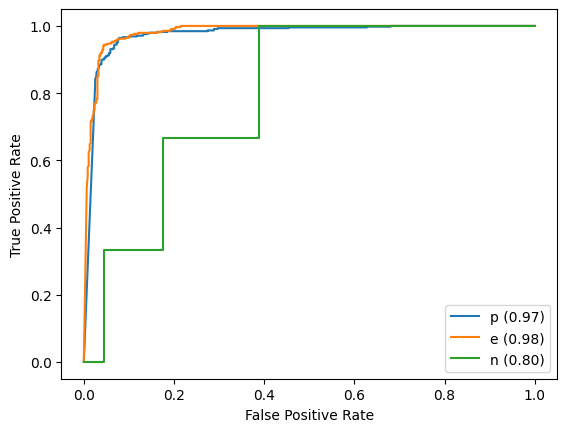

<Figure size 640x480 with 0 Axes>

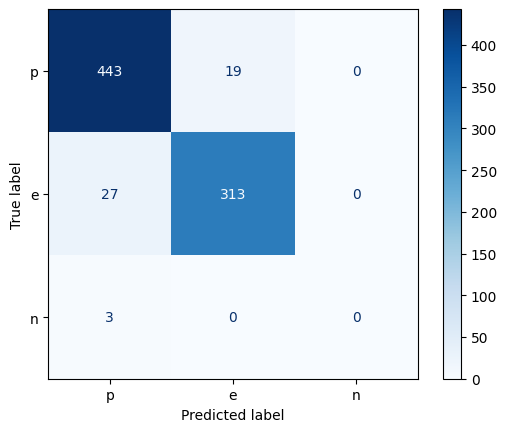

In [18]:
# Make PR curve with Scikit learn

from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, auc
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay


# i = 0 # i is the ensemble idx out of 10

ytrue = []
ypred = []
astro_id_preds = []
tic_id_preds = []
for astro_id in tce_labels.index:
    try:
        ypred.append(np.max(np.array([ensemble_preds[i].loc[astro_id].values for i in range(10)]), axis=0)) # i is the ensemble idx out of 10
        ytrue.append(tce_labels.loc[astro_id].values[:-1])
        astro_id_preds.append(astro_id)
        tic_id_preds.append(tce_labels.loc[astro_id].values[-1])
        # ypred.append(ensemble_preds[i].loc[astro_id].values)
    except Exception as e:
        print("ERROR: No object.", e)
        continue

ytrue = np.array(ytrue).astype(bool)
ypred = np.array(ypred)

# PR curve
plt.figure()
for l, label in enumerate(labels):
    precision, recall, thresholds = precision_recall_curve(ytrue[:,l], ypred[:,l])
    auc_val = auc(recall, precision)
    plt.plot(recall, precision, label=f"{label.split('_')[-1]} ({auc_val:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

# ROC curve
plt.figure()
for l, label in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(ytrue[:,l], ypred[:,l])
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label.split('_')[-1]} ({auc_val:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Confusion Matrix
plt.figure()
cm = confusion_matrix(ytrue.argmax(axis=1),ypred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label.split('_')[-1] for label in labels])
disp.plot(cmap=plt.cm.Blues)


In [19]:
# Counts
tce_labels.sum()

disp_p             449
disp_e             345
disp_n               3
TIC ID    216968729076
dtype: int64

AUC: 0.45629800511867913, max R: 1.0, max P: 0.9833333333333333
100% recall at: 77%, threshold: 0.006500000000054629


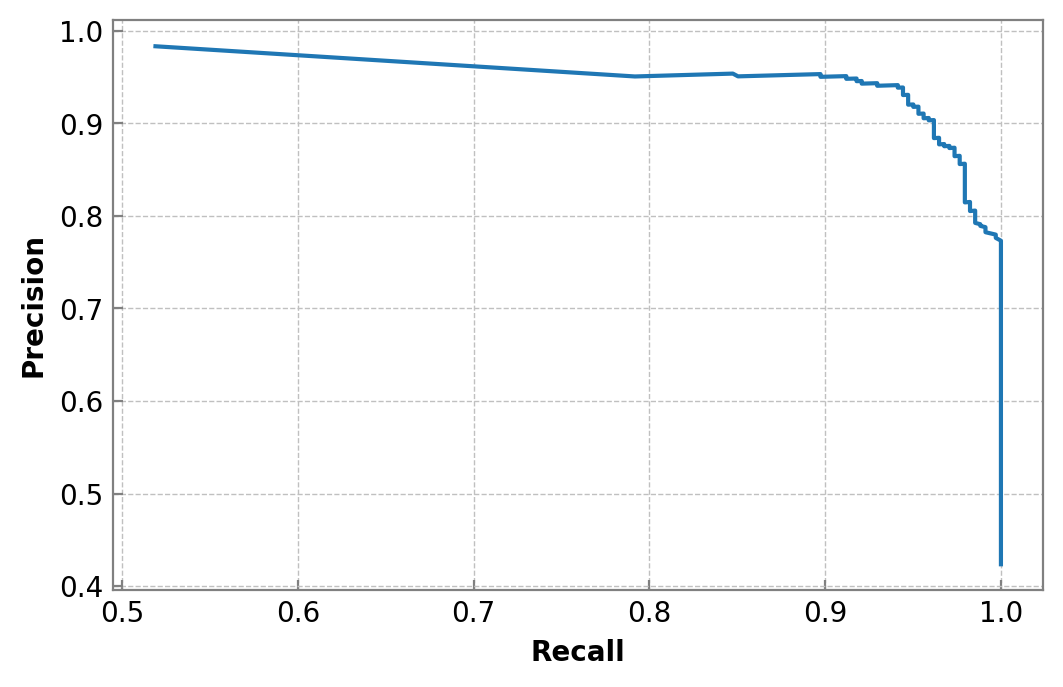

In [20]:
from matplotlib import pyplot as plt

ps, rs, ths = ([], [], [])
th = np.max(pred_es)
while th >= 0.0:
    p, r = pr_at_th(th)
    ps.append(p)
    rs.append(r)
    ths.append(th)
    th -= 0.0005
    
from sklearn import metrics

print(f'AUC: {metrics.auc(rs, ps)}, max R: {max(rs)}, max P: {max(ps)}')
    
i = len(rs) - 1
while rs[i] == 1.0:
    i -= 1
i += 1
print(f'100% recall at: {int(ps[i] * 100)}%, threshold: {ths[i]}')

fig, ax = plt.subplots(figsize=(6, 3.7), dpi=200)

ax.spines['top'].set_color('#808080')
ax.spines['right'].set_color('#808080')
ax.spines['left'].set_color('#808080')
ax.spines['bottom'].set_color('#808080')
ax.tick_params(direction='in', color='#808080')

plt.grid(color='#c0c0c0', linestyle='--', linewidth=0.5)

plt.ylabel('Precision', fontweight='bold')
plt.xlabel('Recall', fontweight='bold')

# plt.xlim((0.0, 1.0))
# plt.ylim((0.0, 1.0))

_ = plt.plot(rs, ps)

In [21]:
i = 0
while ps[i] > 0.749:
    i += 1
print(f'74.9% precision at: {int(rs[i] * 100)}%, threshold: {ths[i]}')

74.9% precision at: 100%, threshold: 0.0020000000000546265


In [22]:
# Get data
from astronet import models
from astronet.astro_cnn_model import input_ds

model_name = 'AstroCNNModelVetting'
config_name = 'base_new'
labels = ['p', 'e', 'n']
config = models.get_model_config(model_name, config_name)

ds = input_ds.build_dataset(
      file_pattern=file_pattern,
      input_config=config.inputs,
      batch_size=1,
      include_labels=False,
      shuffle_filenames=False,
      repeat=1,
      include_identifiers=True)
labels_ds = input_ds.build_dataset(
      file_pattern=file_pattern,
      input_config=config.inputs,
      batch_size=1,
      include_labels=True,
      shuffle_filenames=False,
      repeat=1,
      include_identifiers=True)
labels_iter = iter(labels_ds)


2024-02-26 14:27:47.665941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


In [23]:
# Plot example light curves
ds = ds.cache()
def plot_ds_tce(ds, astro_id):
    for d in ds:
        if d[1] == astro_id:
            for k, v in d[0].items():
                if k.startswith('local_'):
                    continue
                if k.startswith('global_'):
                    continue
                if k.startswith('secondary_'):
                    continue
                if k.startswith('sample_'):
                    continue
                print(f'{k:25}: {v.numpy()}')
            global_view = np.array(d[0]['global_view'][0].numpy())
            local_view = np.array(d[0]['local_view'][0].numpy())
            secondary_view = np.array(d[0]['secondary_view'][0].numpy())
            fig, axes = plt.subplots(2, 3, figsize=(14, 5))
            axes[0, 0].plot(global_view, '.-')
            axes[0, 1].plot(local_view, '.-')
            axes[0, 2].plot(secondary_view, '.-')
            axes[1, 0].plot(d[0]['global_mask'][0].numpy(), '.-')
            axes[1, 1].plot(d[0]['global_view_0.3'][0].numpy(), '.-')
            axes[1, 2].plot(d[0]['global_view_5.0'][0].numpy(), '.-')
            
            # plt.show()
            # plt.close('all')
            plt.tight_layout()
            return fig, axes

In [28]:
pl.loc[573]

disp_p_pred            4
disp_e_pred            6
disp_n_pred            0
maxcount               6
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         188777507
Name: 573, dtype: int64

7 Astro ID: 573 || TIC ID: 188777507 || True label: [False  True False] || Max predicted prob: [0.99 0.91 0.  ]
disp_p_pred            4
disp_e_pred            6
disp_n_pred            0
maxcount               6
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         188777507
Name: 573, dtype: int64
duration                 : [[-0.05789266]]
period                   : [[0.02835233]]
tmag                     : [[-0.31831262]]
transit_depth            : [[0.33617586]]
n_folds                  : [[0.573064]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.166109]]
star_rad_est             : [[-0.11161918]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:20.472680: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


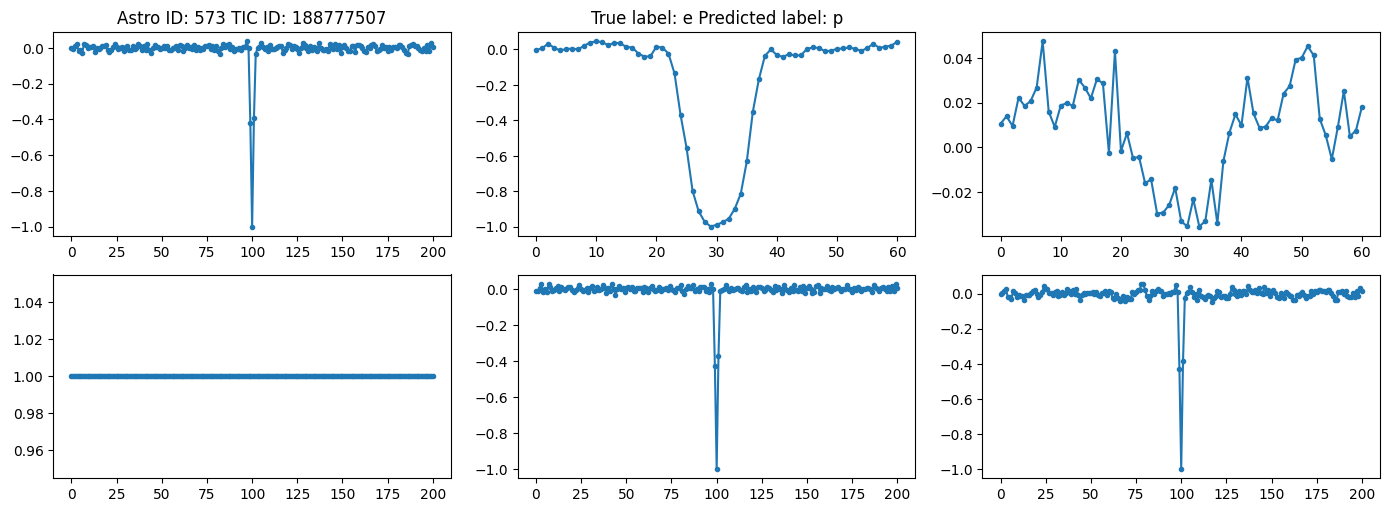

67 Astro ID: 1795 || TIC ID: 48188920 || True label: [False  True False] || Max predicted prob: [1.   0.22 0.  ]
disp_p_pred           9
disp_e_pred           1
disp_n_pred           0
maxcount              9
disp_p                0
disp_e                1
disp_n                0
TIC ID         48188920
Name: 1795, dtype: int64
duration                 : [[-0.30721736]]
period                   : [[-0.5620734]]
tmag                     : [[0.24233428]]
transit_depth            : [[0.2444358]]
n_folds                  : [[0.9316614]]
star_mass                : [[0.77167034]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.4610673]]
star_rad_est             : [[-0.20854339]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:21.343474: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


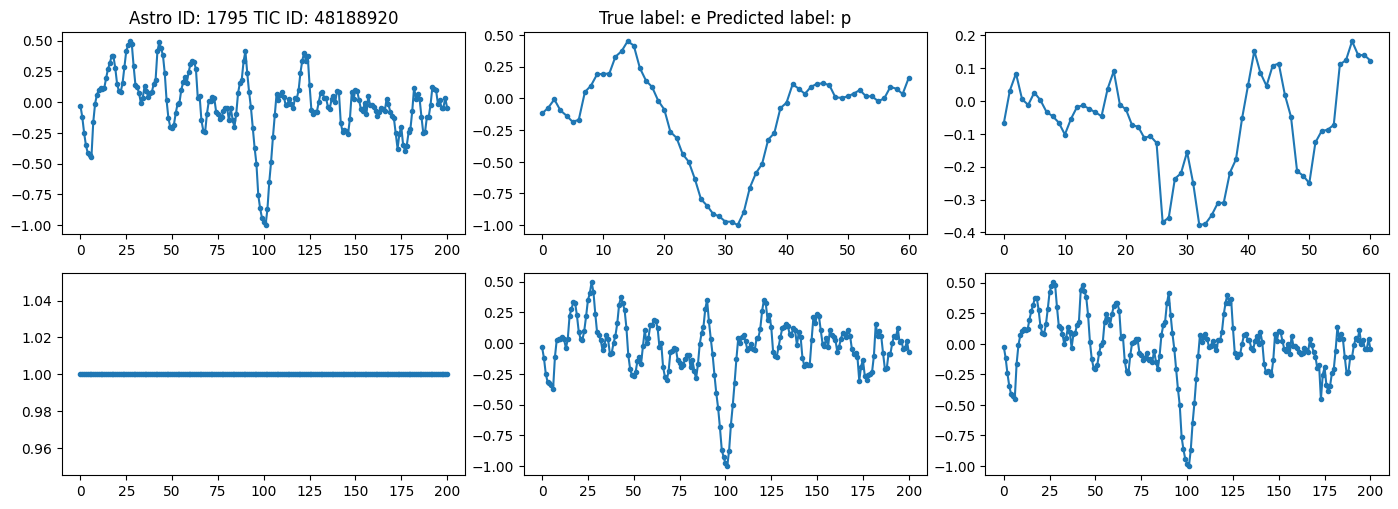

78 Astro ID: 2551 || TIC ID: 261261490 || True label: [False  True False] || Max predicted prob: [1.   0.02 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         261261490
Name: 2551, dtype: int64
duration                 : [[-0.136288]]
period                   : [[-0.46187192]]
tmag                     : [[0.7290052]]
transit_depth            : [[0.27137497]]
n_folds                  : [[1.0021607]]
star_mass                : [[0.69805866]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.5278469]]
star_rad_est             : [[-0.21905954]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:23.426571: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


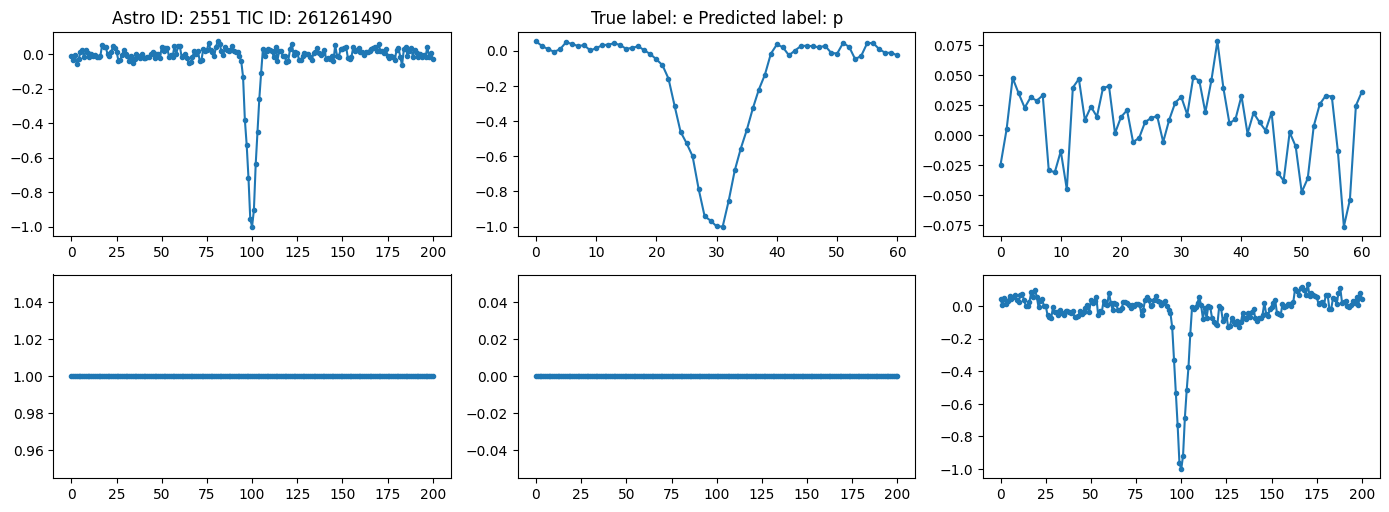

84 Astro ID: 2725 || TIC ID: 300291839 || True label: [False  True False] || Max predicted prob: [1.   0.01 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         300291839
Name: 2725, dtype: int64
duration                 : [[-0.1920191]]
period                   : [[-0.2570732]]
tmag                     : [[1.1221931]]
transit_depth            : [[0.30035558]]
n_folds                  : [[1.0021607]]
star_mass                : [[0.47722393]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.4486109]]
star_rad_est             : [[-0.21231079]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:24.345868: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


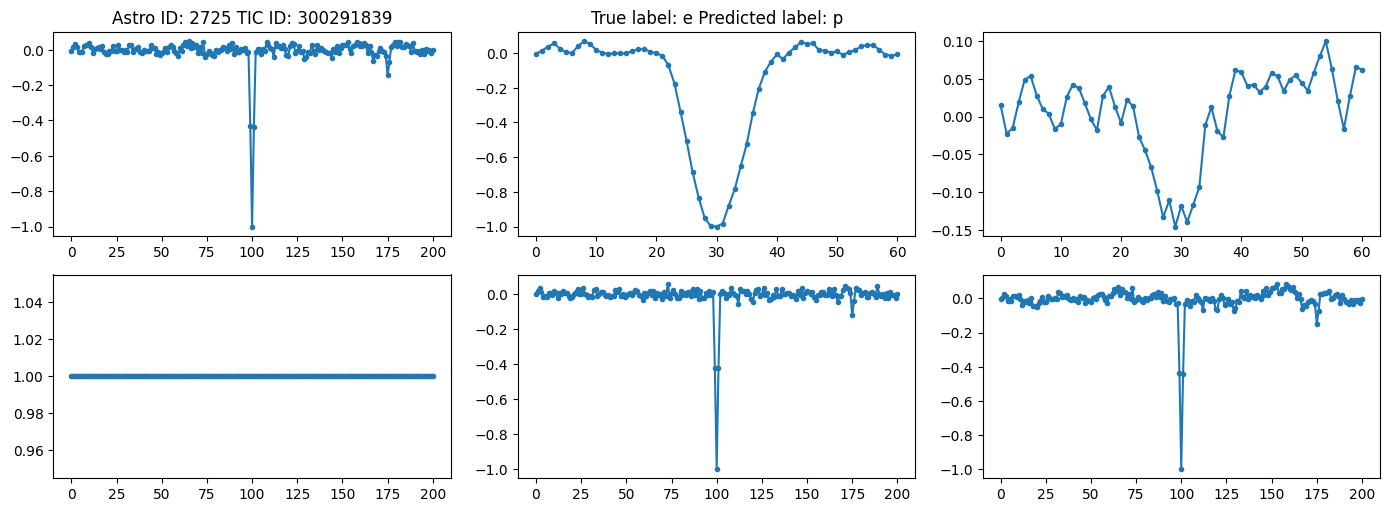

88 Astro ID: 2398 || TIC ID: 232679662 || True label: [False  True False] || Max predicted prob: [0.99 0.76 0.  ]
disp_p_pred            7
disp_e_pred            3
disp_n_pred            0
maxcount               7
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         232679662
Name: 2398, dtype: int64
duration                 : [[0.056492]]
period                   : [[-0.30719143]]
tmag                     : [[0.6836345]]
transit_depth            : [[0.36576697]]
n_folds                  : [[0.81673425]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.18412717]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:25.300717: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


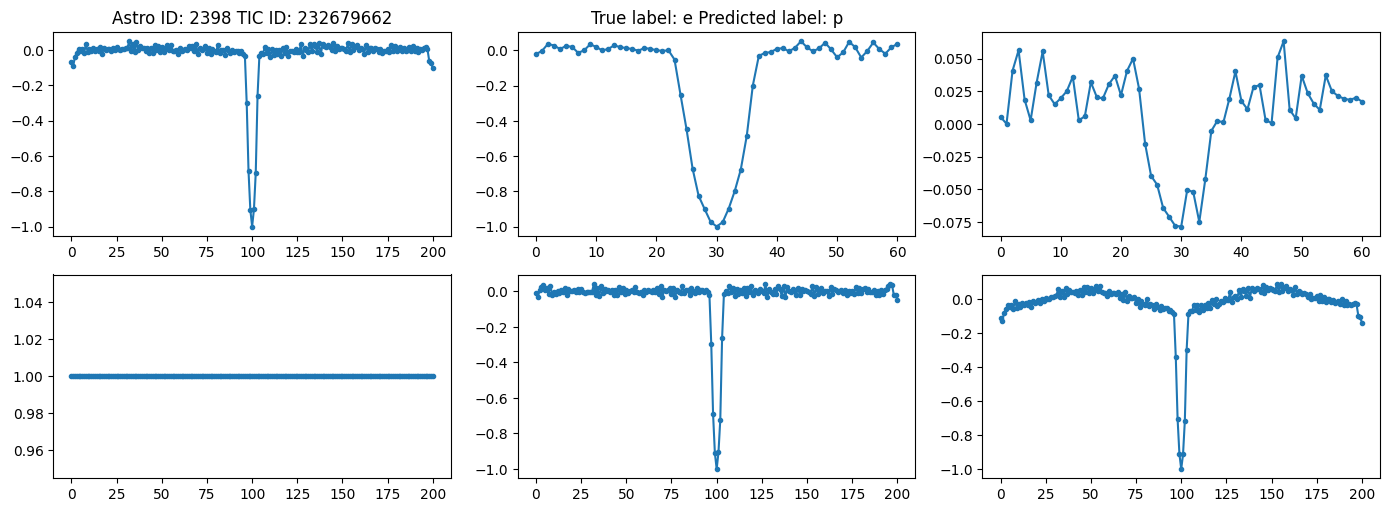

90 Astro ID: 8529 || TIC ID: 399868187 || True label: [ True False False] || Max predicted prob: [0.1 1.  0. ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         399868187
Name: 8529, dtype: int64
duration                 : [[-0.19484356]]
period                   : [[-0.54431283]]
tmag                     : [[0.8287824]]
transit_depth            : [[0.31960598]]
n_folds                  : [[0.9460473]]
star_mass                : [[0.7753509]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.5147792]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:26.223048: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


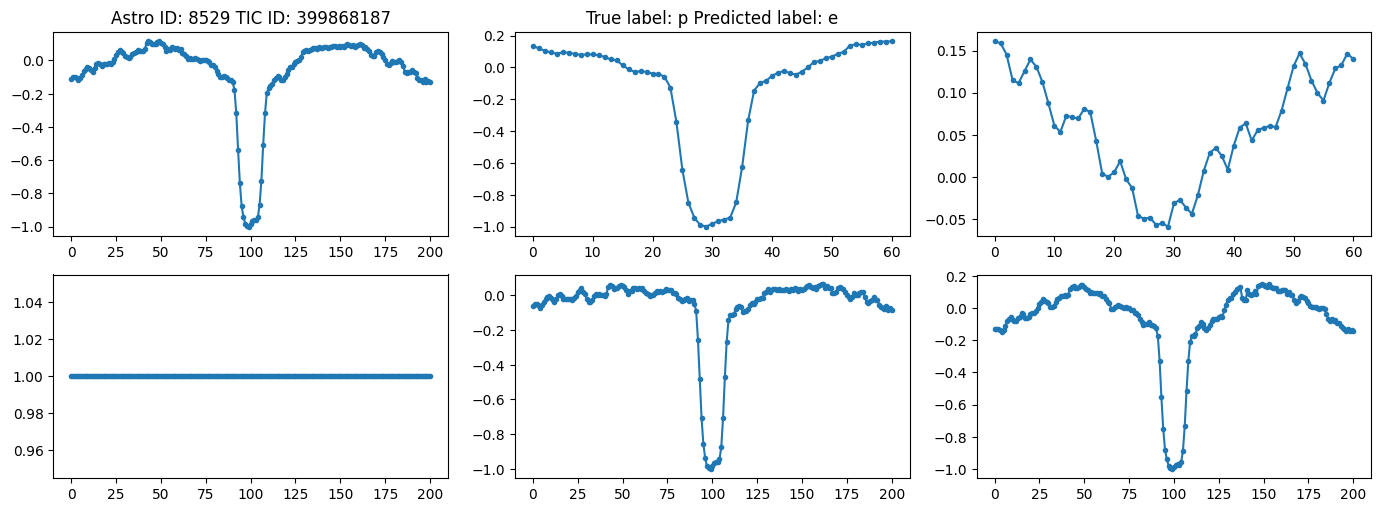

120 Astro ID: 2547 || TIC ID: 260985864 || True label: [False  True False] || Max predicted prob: [1.   0.03 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         260985864
Name: 2547, dtype: int64
duration                 : [[-0.10154742]]
period                   : [[-0.46882603]]
tmag                     : [[0.74732774]]
transit_depth            : [[0.3189797]]
n_folds                  : [[0.951545]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[2.8723464]]
star_rad_est             : [[0.5579263]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:27.183262: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


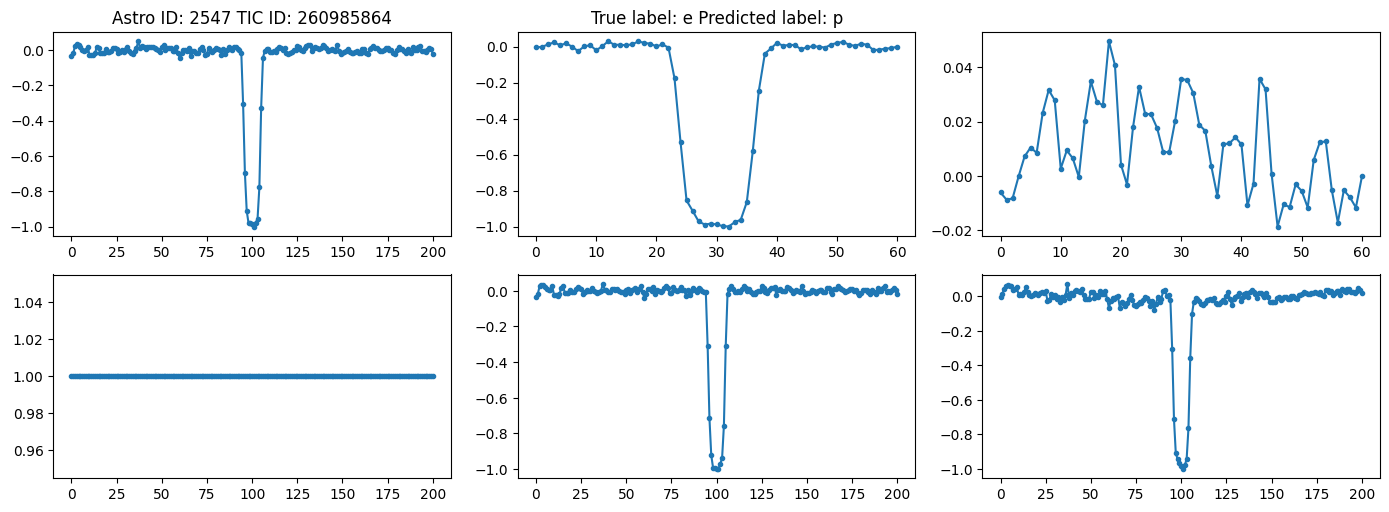

125 Astro ID: 2084 || TIC ID: 150360010 || True label: [False  True False] || Max predicted prob: [1.   0.15 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         150360010
Name: 2084, dtype: int64
duration                 : [[-0.09831856]]
period                   : [[-0.45549008]]
tmag                     : [[0.5464646]]
transit_depth            : [[0.2064401]]
n_folds                  : [[1.0021607]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.4200613]]
star_rad_est             : [[-0.06258788]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:28.152687: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


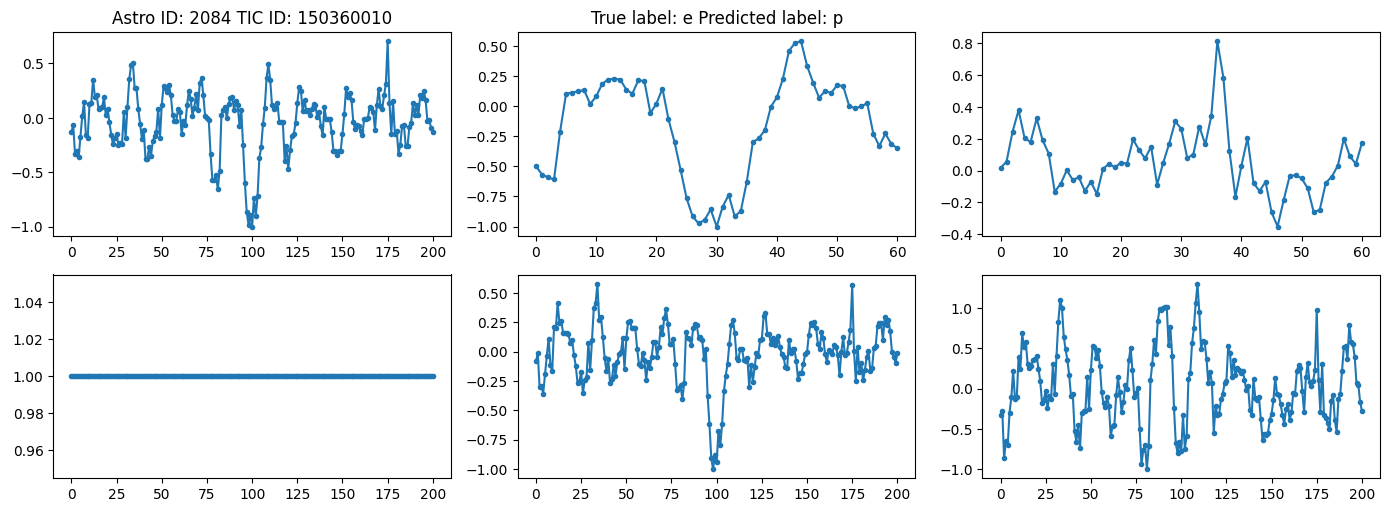

128 Astro ID: 1345 || TIC ID: 373917747 || True label: [False  True False] || Max predicted prob: [1.   0.62 0.  ]
disp_p_pred            9
disp_e_pred            1
disp_n_pred            0
maxcount               9
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         373917747
Name: 1345, dtype: int64
duration                 : [[-0.07190149]]
period                   : [[-0.46147296]]
tmag                     : [[1.4334282]]
transit_depth            : [[0.32859996]]
n_folds                  : [[1.0021607]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.152169]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:29.123651: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


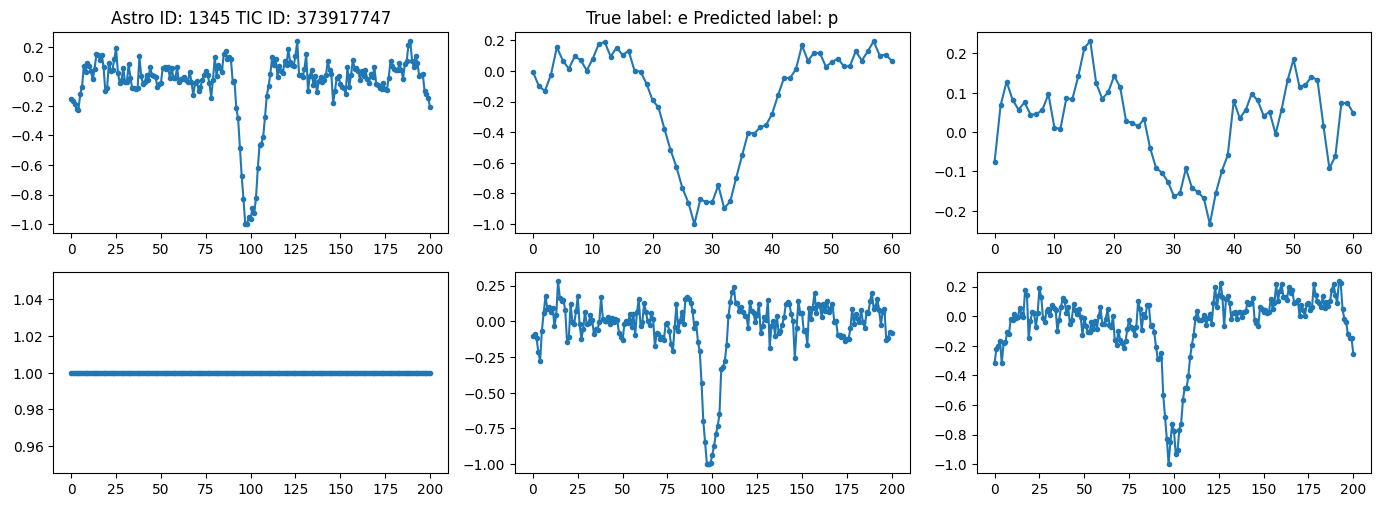

162 Astro ID: 2046 || TIC ID: 141123393 || True label: [False  True False] || Max predicted prob: [1.   0.01 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         141123393
Name: 2046, dtype: int64
duration                 : [[-0.0975023]]
period                   : [[0.02706132]]
tmag                     : [[0.60990816]]
transit_depth            : [[0.24313444]]
n_folds                  : [[0.7841009]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.3729683]]
star_rad_est             : [[-0.06440285]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:29.807014: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


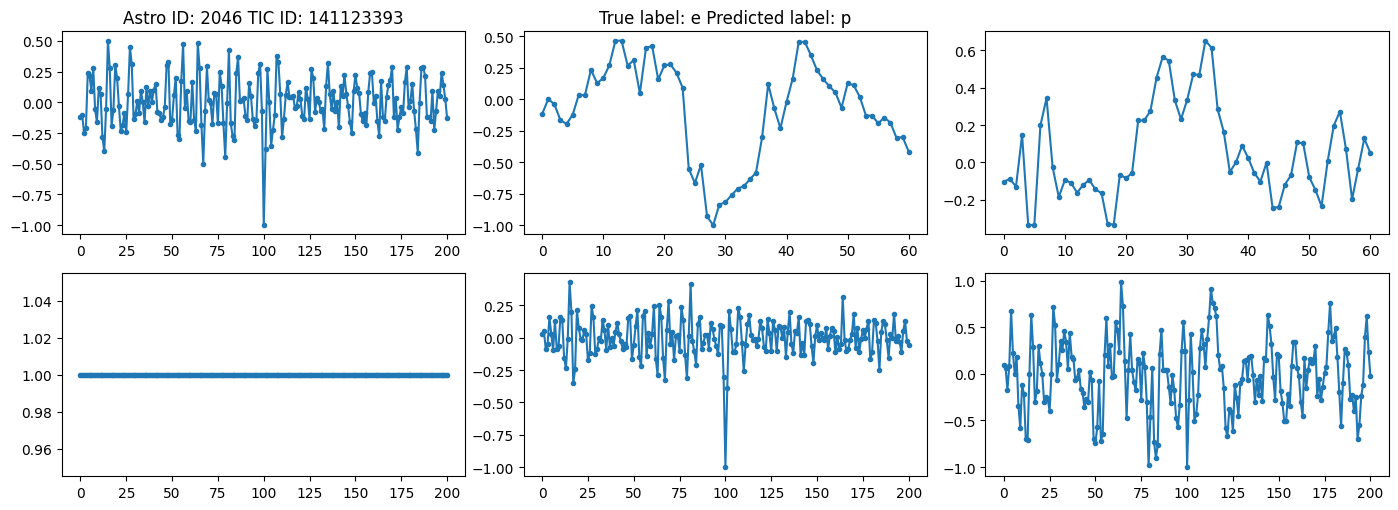

163 Astro ID: 2452 || TIC ID: 239278684 || True label: [False  True False] || Max predicted prob: [0.95 0.89 0.  ]
disp_p_pred            3
disp_e_pred            7
disp_n_pred            0
maxcount               7
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         239278684
Name: 2452, dtype: int64
duration                 : [[-0.18324813]]
period                   : [[-0.50483537]]
tmag                     : [[0.5902769]]
transit_depth            : [[0.29142934]]
n_folds                  : [[0.69897]]
star_mass                : [[1.4096373]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.42118597]]
star_rad_est             : [[-0.20144153]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:30.493692: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


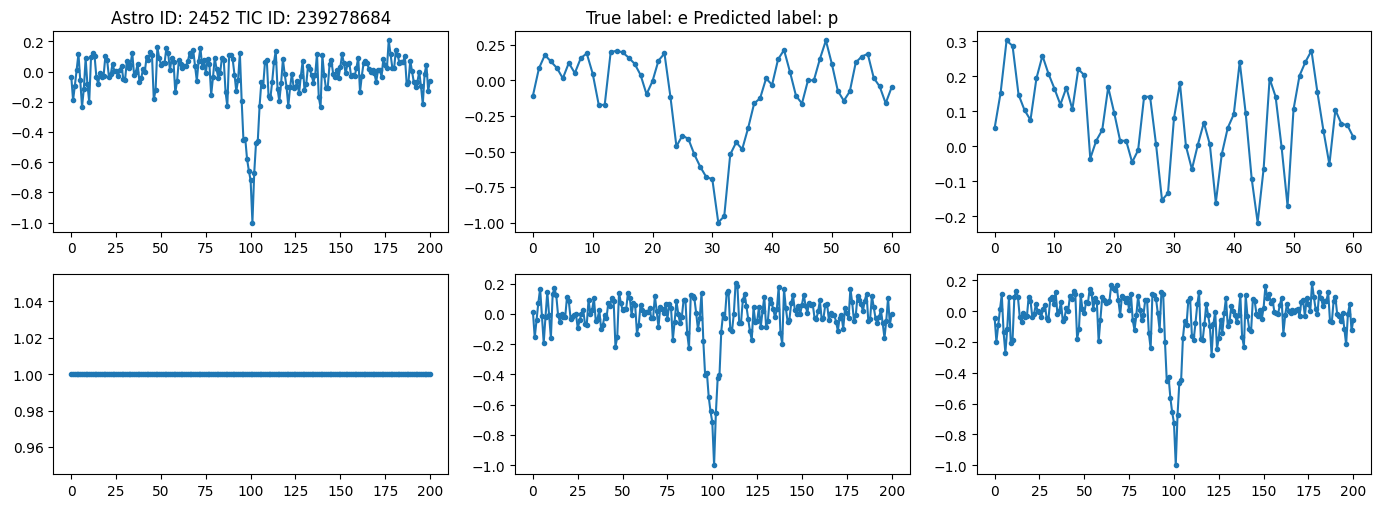

201 Astro ID: 1411 || TIC ID: 384744828 || True label: [False  True False] || Max predicted prob: [1.   0.25 0.  ]
disp_p_pred            9
disp_e_pred            1
disp_n_pred            0
maxcount               9
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         384744828
Name: 1411, dtype: int64
duration                 : [[-0.26086903]]
period                   : [[-0.4795139]]
tmag                     : [[0.37476787]]
transit_depth            : [[0.2798792]]
n_folds                  : [[0.7898918]]
star_mass                : [[0.77167034]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.4298524]]
star_rad_est             : [[-0.2020508]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:31.240488: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


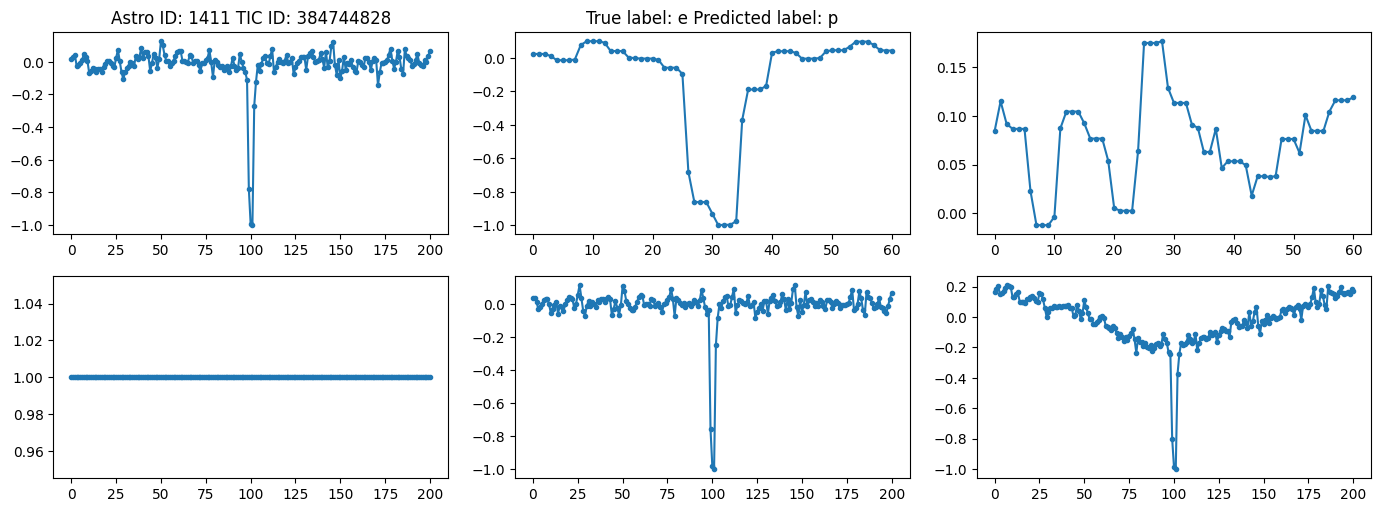

218 Astro ID: 56 || TIC ID: 117378334 || True label: [ True False False] || Max predicted prob: [0.91 1.   0.  ]
disp_p_pred            2
disp_e_pred            8
disp_n_pred            0
maxcount               8
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         117378334
Name: 56, dtype: int64
duration                 : [[-0.05853416]]
period                   : [[-0.27140072]]
tmag                     : [[-0.5854615]]
transit_depth            : [[0.35691947]]
n_folds                  : [[0.451545]]
star_mass                : [[0.48335823]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.4824613]]
star_rad_est             : [[-0.21269529]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:32.711106: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


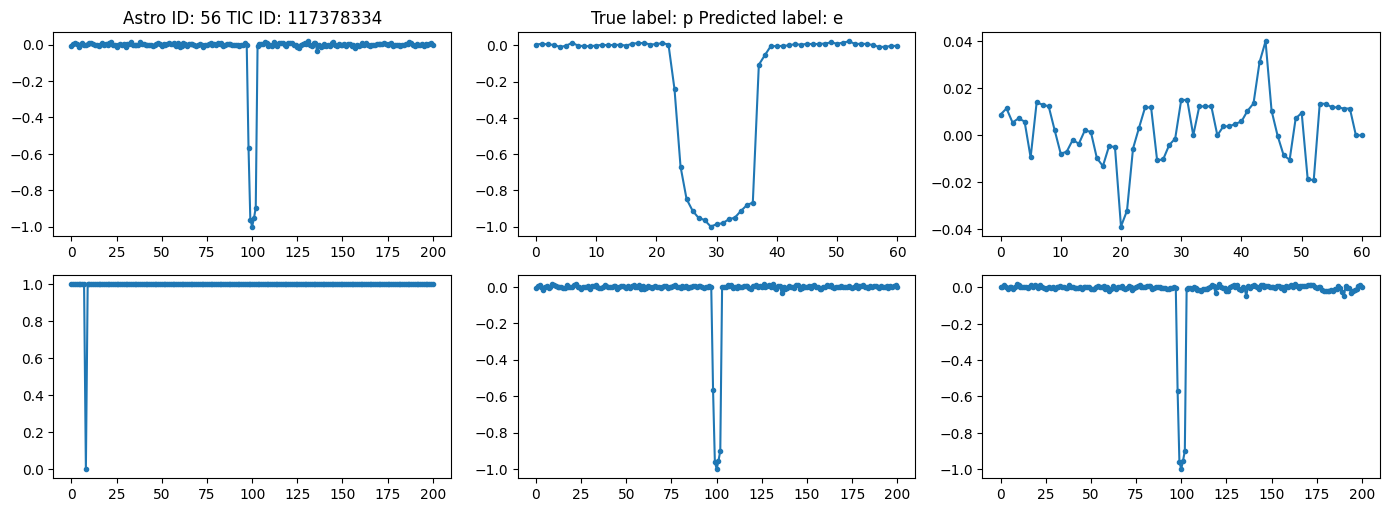

247 Astro ID: 3134 || TIC ID: 347641245 || True label: [ True False False] || Max predicted prob: [0.09 1.   0.  ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         347641245
Name: 3134, dtype: int64
duration                 : [[-0.05069981]]
period                   : [[-0.20570691]]
tmag                     : [[0.68382174]]
transit_depth            : [[0.37427145]]
n_folds                  : [[0.38907564]]
star_mass                : [[1.3789661]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.525945]]
star_rad_est             : [[-0.21623236]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:33.451797: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


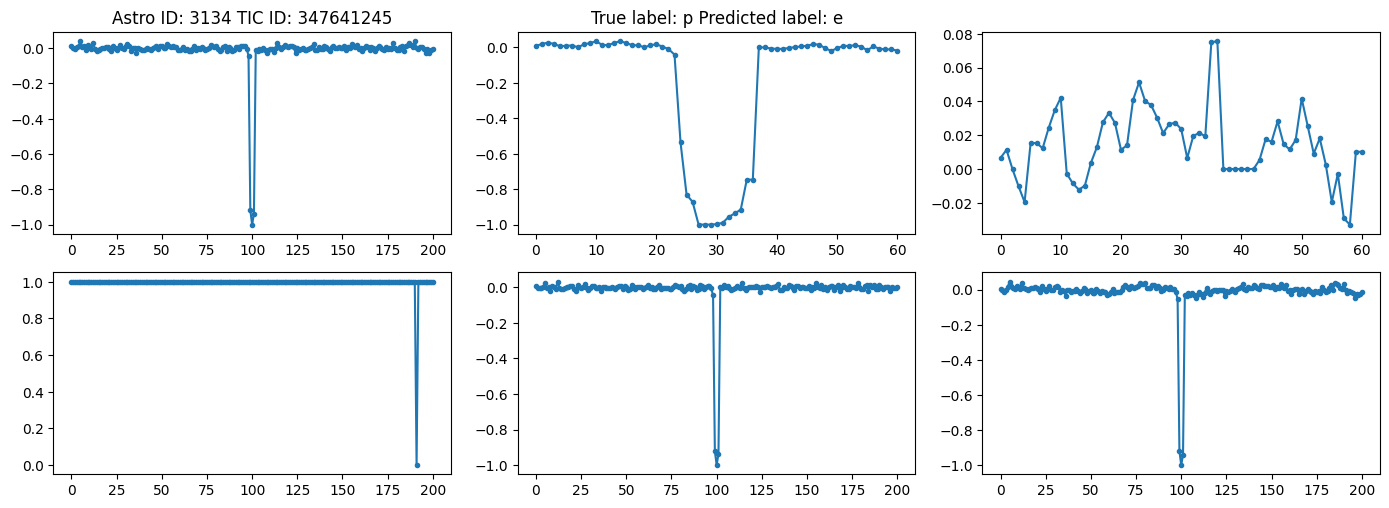

253 Astro ID: 2047 || TIC ID: 141146530 || True label: [False False False] || Max predicted prob: [0.77 1.   0.  ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 0
disp_n                 0
TIC ID         141146530
Name: 2047, dtype: int64
duration                 : [[-0.07752923]]
period                   : [[-0.38747522]]
tmag                     : [[-1.1865802]]
transit_depth            : [[0.2400114]]
n_folds                  : [[0.67121136]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.39262763]]
star_rad_est             : [[-0.06760375]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:34.196612: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


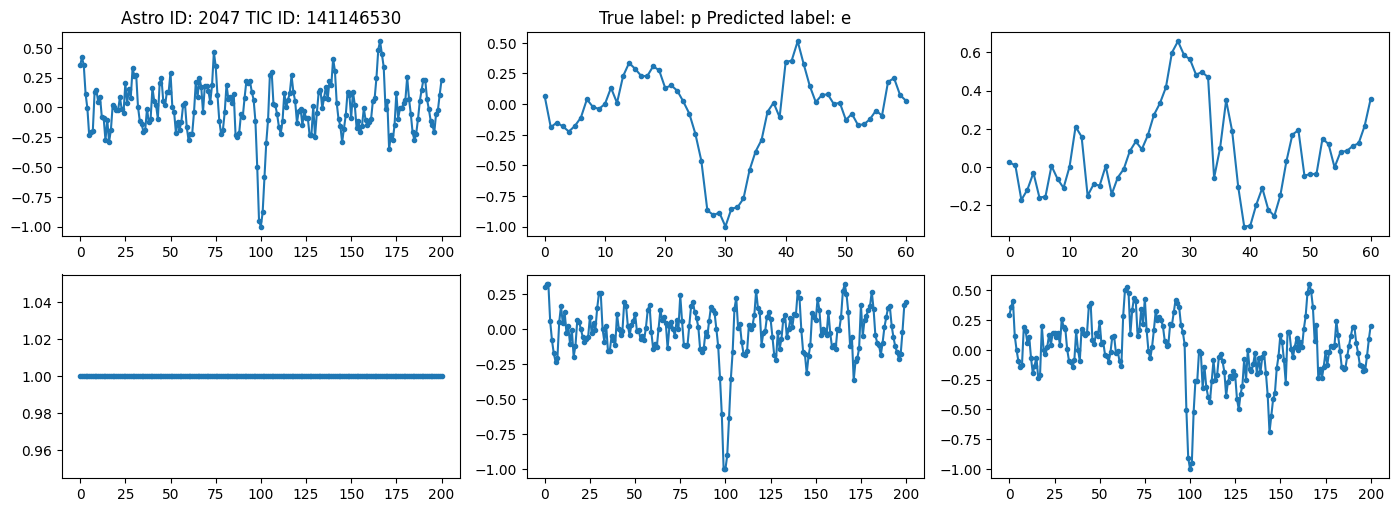

274 Astro ID: 1844 || TIC ID: 70141795 || True label: [False  True False] || Max predicted prob: [1.   0.63 0.  ]
disp_p_pred           8
disp_e_pred           2
disp_n_pred           0
maxcount              8
disp_p                0
disp_e                1
disp_n                0
TIC ID         70141795
Name: 1844, dtype: int64
duration                 : [[-0.18397747]]
period                   : [[-0.50396734]]
tmag                     : [[0.7418431]]
transit_depth            : [[0.30692872]]
n_folds                  : [[0.6808639]]
star_mass                : [[2.992287]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.37722218]]
star_rad_est             : [[-0.19461389]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:34.984826: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


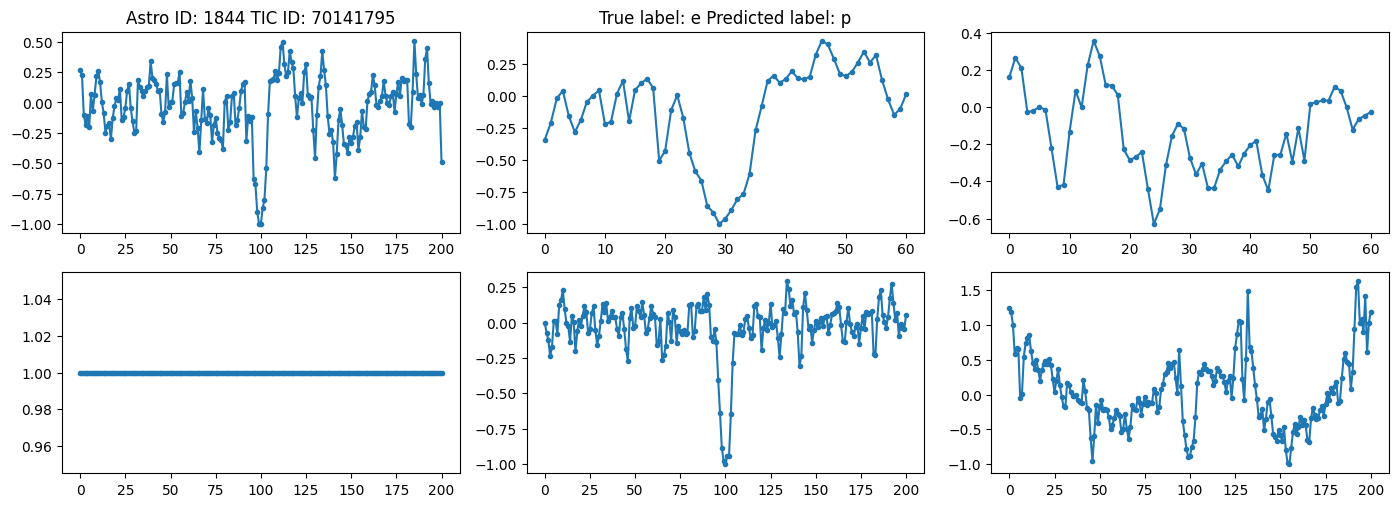

307 Astro ID: 1884 || TIC ID: 84356562 || True label: [ True False False] || Max predicted prob: [0.68 1.   0.  ]
disp_p_pred           0
disp_e_pred          10
disp_n_pred           0
maxcount             10
disp_p                1
disp_e                0
disp_n                0
TIC ID         84356562
Name: 1884, dtype: int64
duration                 : [[-0.1671017]]
period                   : [[-0.32261264]]
tmag                     : [[1.0839896]]
transit_depth            : [[0.30044267]]
n_folds                  : [[0.47712126]]
star_mass                : [[2.1212163]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.40174627]]
star_rad_est             : [[-0.20358248]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:35.792222: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


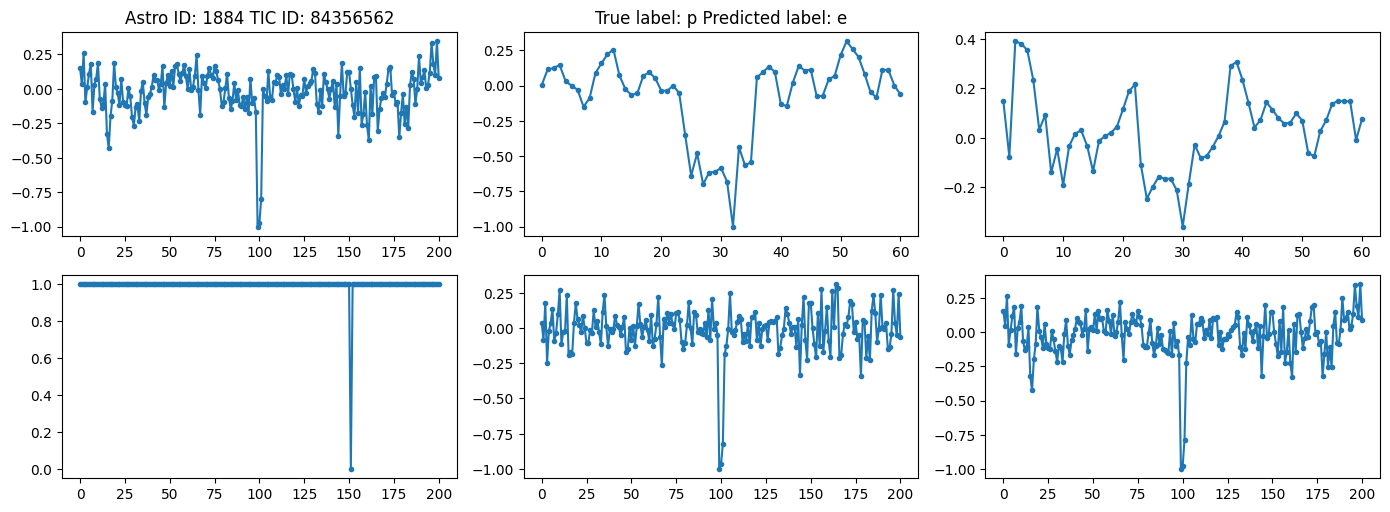

317 Astro ID: 3843 || TIC ID: 1717079071 || True label: [ True False False] || Max predicted prob: [0.9  0.97 0.  ]
disp_p_pred             3
disp_e_pred             7
disp_n_pred             0
maxcount                7
disp_p                  1
disp_e                  0
disp_n                  0
TIC ID         1717079071
Name: 3843, dtype: int64
duration                 : [[-0.15188108]]
period                   : [[-0.52532506]]
tmag                     : [[0.6392618]]
transit_depth            : [[0.3363575]]
n_folds                  : [[0.752575]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.21341147]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:36.604404: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


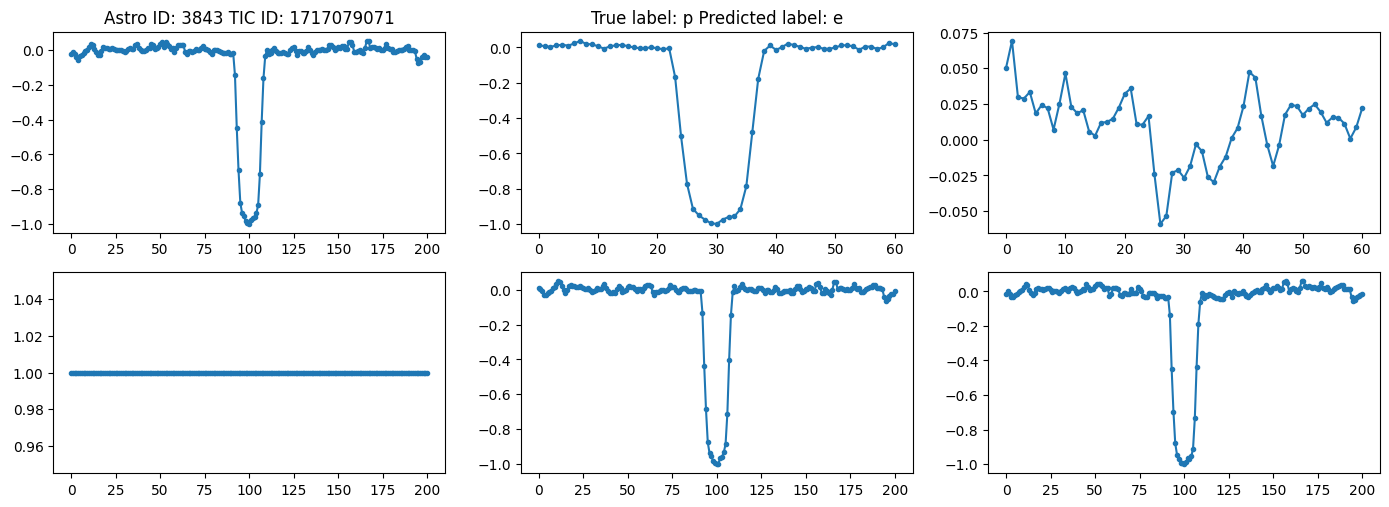

324 Astro ID: 2230 || TIC ID: 192094773 || True label: [ True  True False] || Max predicted prob: [0. 1. 0.]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 1
disp_e                 2
disp_n                 0
TIC ID         192094773
Name: 2230, dtype: int64
duration                 : [[0.14193025]]
period                   : [[-0.01909606]]
tmag                     : [[-0.5303941]]
transit_depth            : [[0.4061546]]
n_folds                  : [[0.47712126]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[2.4402392]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:38.035770: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


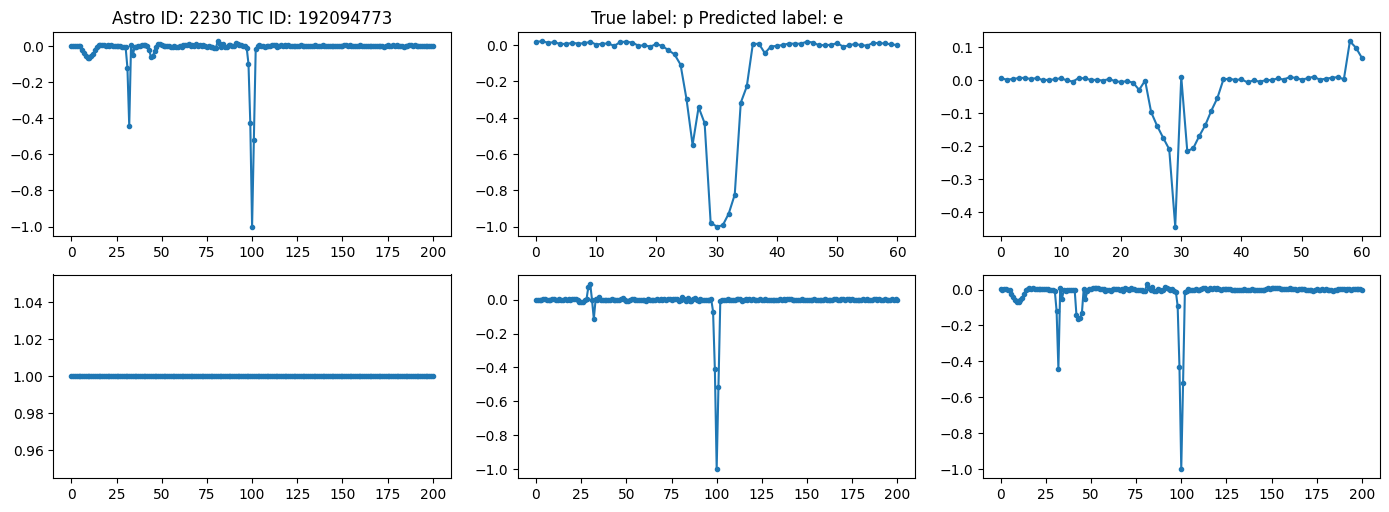

334 Astro ID: 3899 || TIC ID: 5109298 || True label: [False False  True] || Max predicted prob: [1.   0.09 0.  ]
disp_p_pred         10
disp_e_pred          0
disp_n_pred          0
maxcount            10
disp_p               0
disp_e               0
disp_n               1
TIC ID         5109298
Name: 3899, dtype: int64
duration                 : [[-0.06977752]]
period                   : [[-0.5304592]]
tmag                     : [[0.91297877]]
transit_depth            : [[0.29869932]]
n_folds                  : [[0.8926649]]
star_mass                : [[2.010799]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.4472057]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:39.349652: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


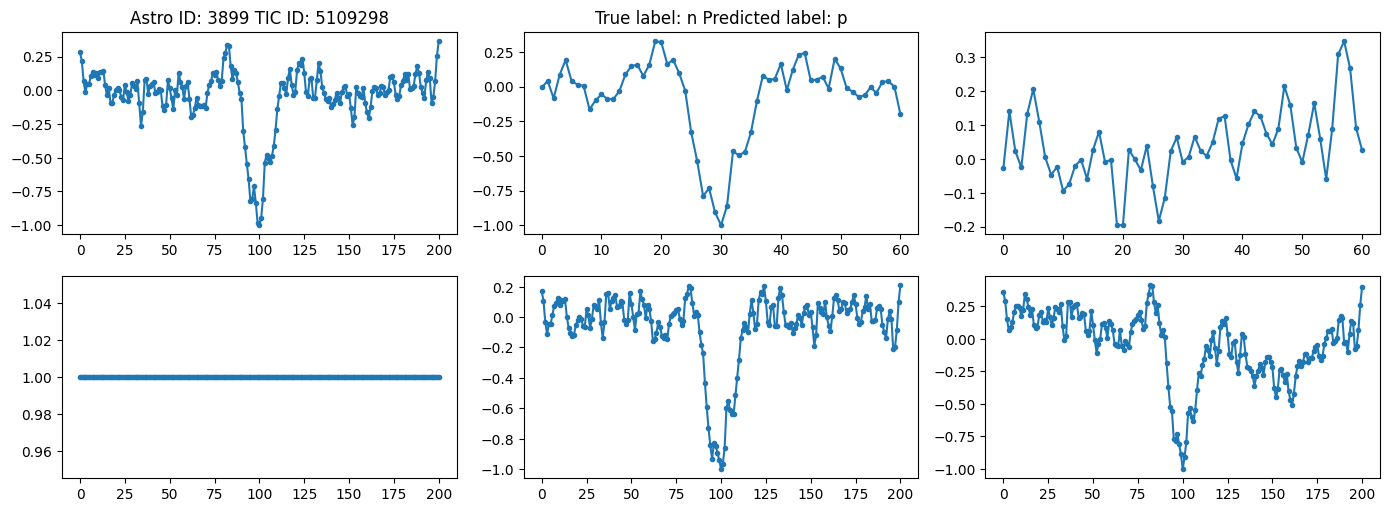

338 Astro ID: 3763 || TIC ID: 466058558 || True label: [False False False] || Max predicted prob: [0.42 1.   0.  ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 0
disp_n                 0
TIC ID         466058558
Name: 3763, dtype: int64
duration                 : [[-0.01561453]]
period                   : [[-0.46662232]]
tmag                     : [[-0.4205207]]
transit_depth            : [[0.2630028]]
n_folds                  : [[0.58804566]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.34091857]]
star_rad_est             : [[-0.06764963]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:40.651786: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


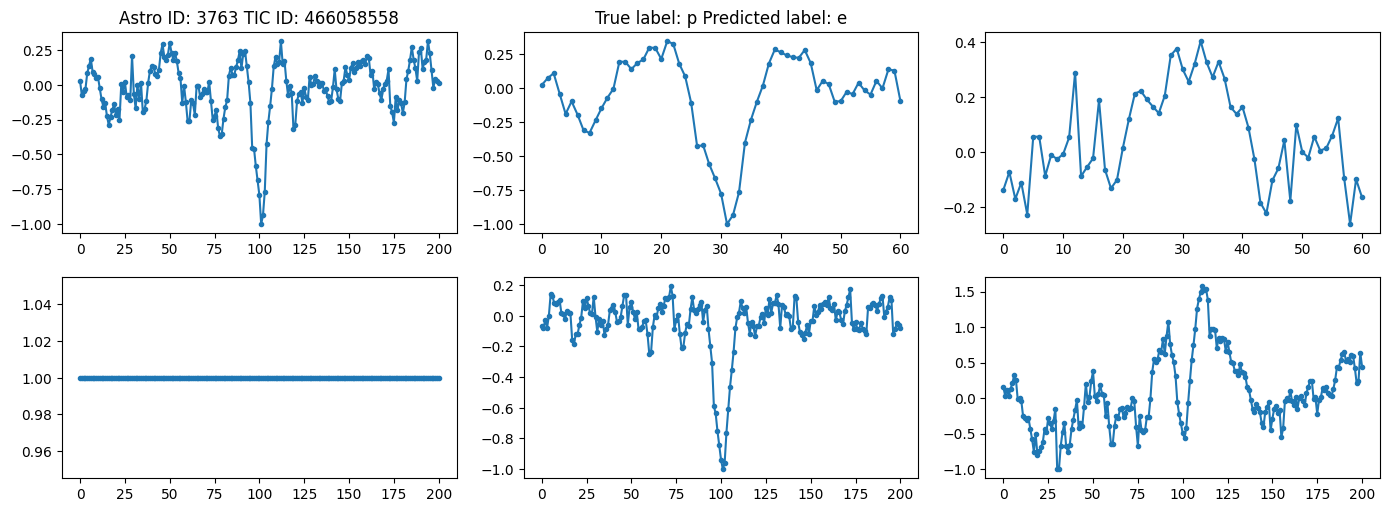

349 Astro ID: 2021 || TIC ID: 136209118 || True label: [ True False False] || Max predicted prob: [0.83 0.98 0.  ]
disp_p_pred            1
disp_e_pred            9
disp_n_pred            0
maxcount               9
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         136209118
Name: 2021, dtype: int64
duration                 : [[-0.1117947]]
period                   : [[-0.51306343]]
tmag                     : [[-0.00608076]]
transit_depth            : [[0.22449093]]
n_folds                  : [[0.83137894]]
star_mass                : [[2.2316337]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.2540943]]
star_rad_est             : [[-0.17207679]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:41.963757: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


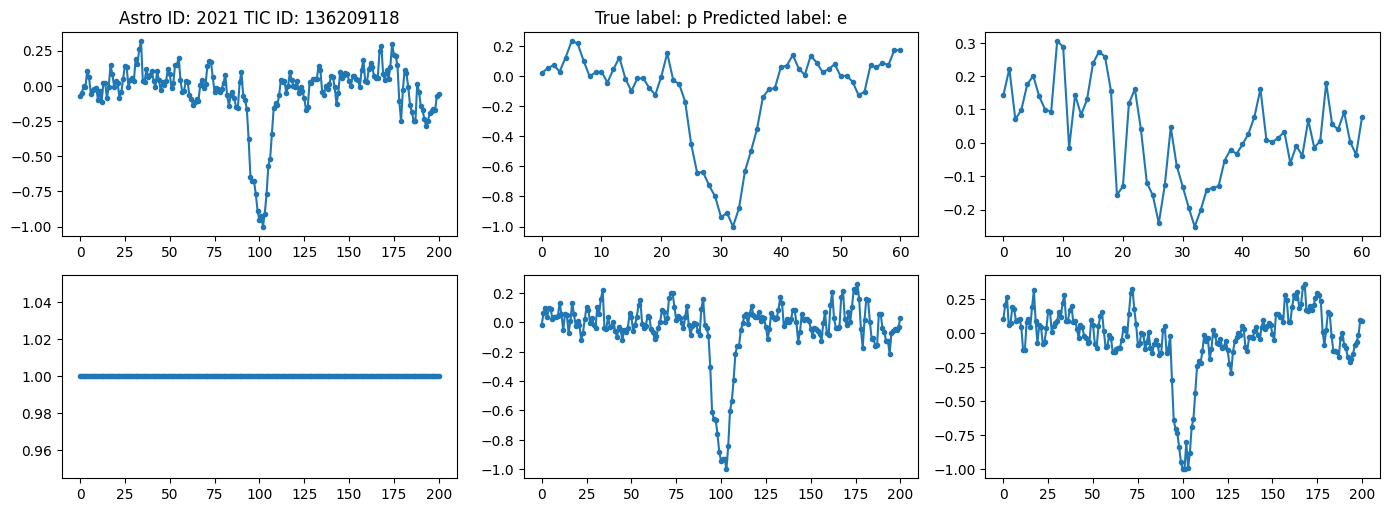

406 Astro ID: 3530 || TIC ID: 439946040 || True label: [False False False] || Max predicted prob: [0.9 1.  0. ]
disp_p_pred            3
disp_e_pred            7
disp_n_pred            0
maxcount               7
disp_p                 0
disp_e                 0
disp_n                 0
TIC ID         439946040
Name: 3530, dtype: int64
duration                 : [[0.04247389]]
period                   : [[-0.44655025]]
tmag                     : [[-1.3403903]]
transit_depth            : [[0.24631588]]
n_folds                  : [[0.52069634]]
star_mass                : [[0.59990996]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.4954755]]
star_rad_est             : [[-0.21283785]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:44.137856: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


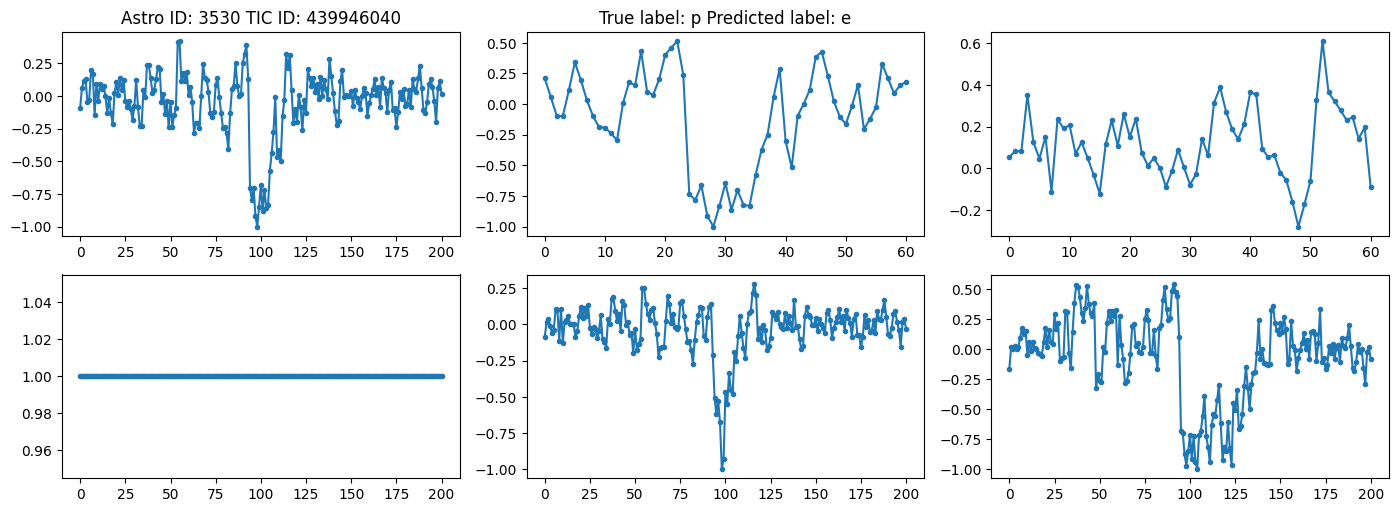

416 Astro ID: 1053 || TIC ID: 311890977 || True label: [False  True False] || Max predicted prob: [0.97 0.97 0.  ]
disp_p_pred            3
disp_e_pred            7
disp_n_pred            0
maxcount               7
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         311890977
Name: 1053, dtype: int64
duration                 : [[-0.20133916]]
period                   : [[-0.3508261]]
tmag                     : [[0.8477902]]
transit_depth            : [[0.2766347]]
n_folds                  : [[0.6393768]]
star_mass                : [[-0.13620602]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.59488416]]
star_rad_est             : [[-0.22998442]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:45.536126: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


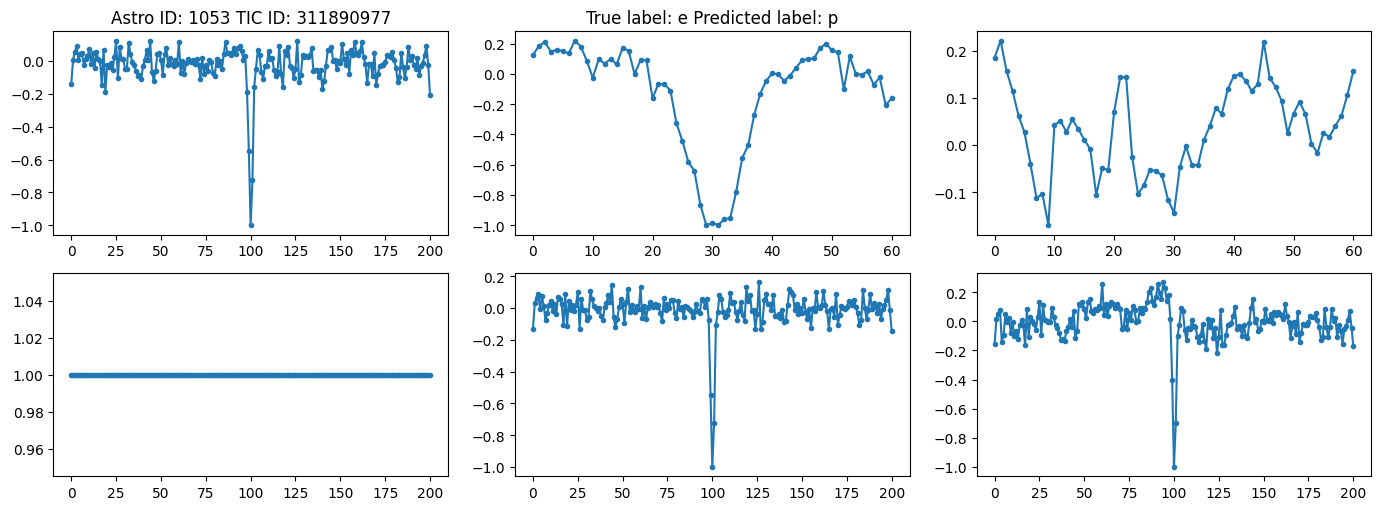

417 Astro ID: 3730 || TIC ID: 464889047 || True label: [False  True False] || Max predicted prob: [1.   0.02 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         464889047
Name: 3730, dtype: int64
duration                 : [[-0.04748246]]
period                   : [[-0.4851227]]
tmag                     : [[0.9064974]]
transit_depth            : [[0.26147822]]
n_folds                  : [[0.7781513]]
star_mass                : [[1.029311]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.51588213]]
star_rad_est             : [[-0.21724032]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:46.900648: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


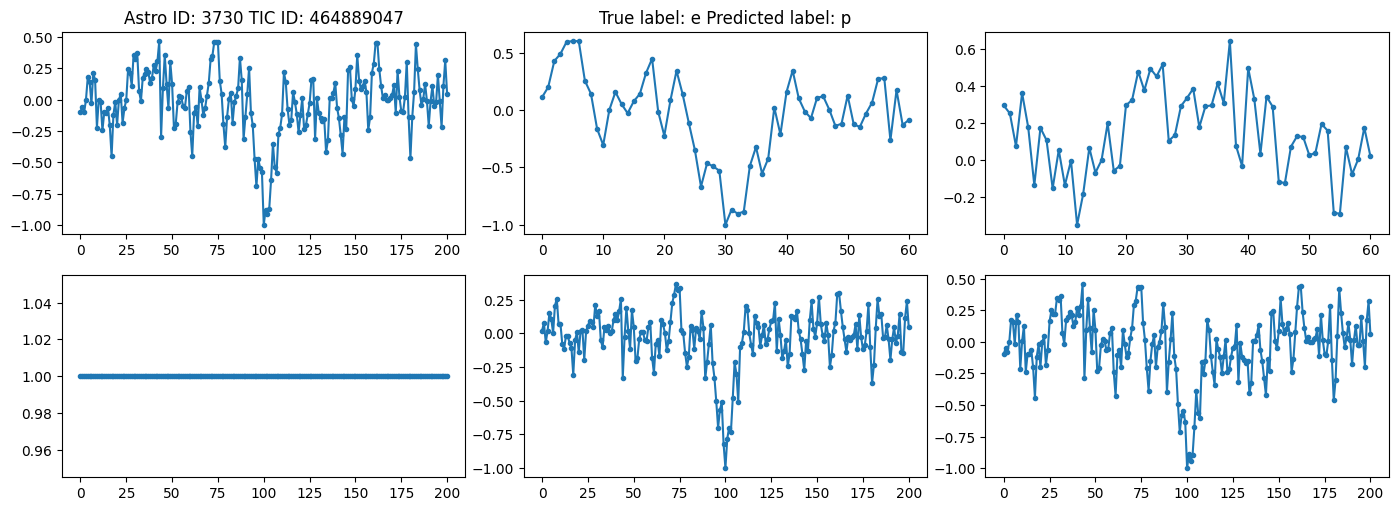

497 Astro ID: 1208 || TIC ID: 350995806 || True label: [False  True False] || Max predicted prob: [0.96 0.93 0.  ]
disp_p_pred            3
disp_e_pred            7
disp_n_pred            0
maxcount               7
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         350995806
Name: 1208, dtype: int64
duration                 : [[-0.25576428]]
period                   : [[-0.48202914]]
tmag                     : [[-0.60031897]]
transit_depth            : [[0.32959244]]
n_folds                  : [[0.62763625]]
star_mass                : [[2.5383487]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.31880102]]
star_rad_est             : [[-0.19021517]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:47.928655: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


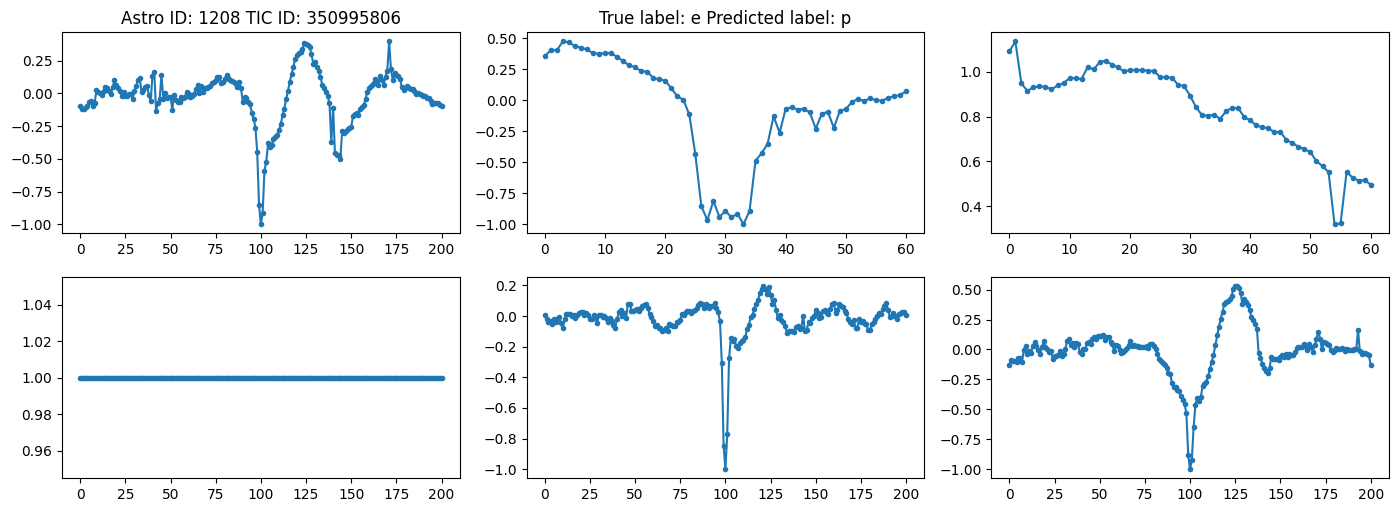

502 Astro ID: 871 || TIC ID: 282555160 || True label: [False  True False] || Max predicted prob: [0.99 0.57 0.  ]
disp_p_pred            6
disp_e_pred            4
disp_n_pred            0
maxcount               6
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         282555160
Name: 871, dtype: int64
duration                 : [[0.00326241]]
period                   : [[-0.43455264]]
tmag                     : [[-0.17843188]]
transit_depth            : [[0.33241785]]
n_folds                  : [[0.6808639]]
star_mass                : [[1.2869515]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.38433278]]
star_rad_est             : [[-0.19664907]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:48.934129: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


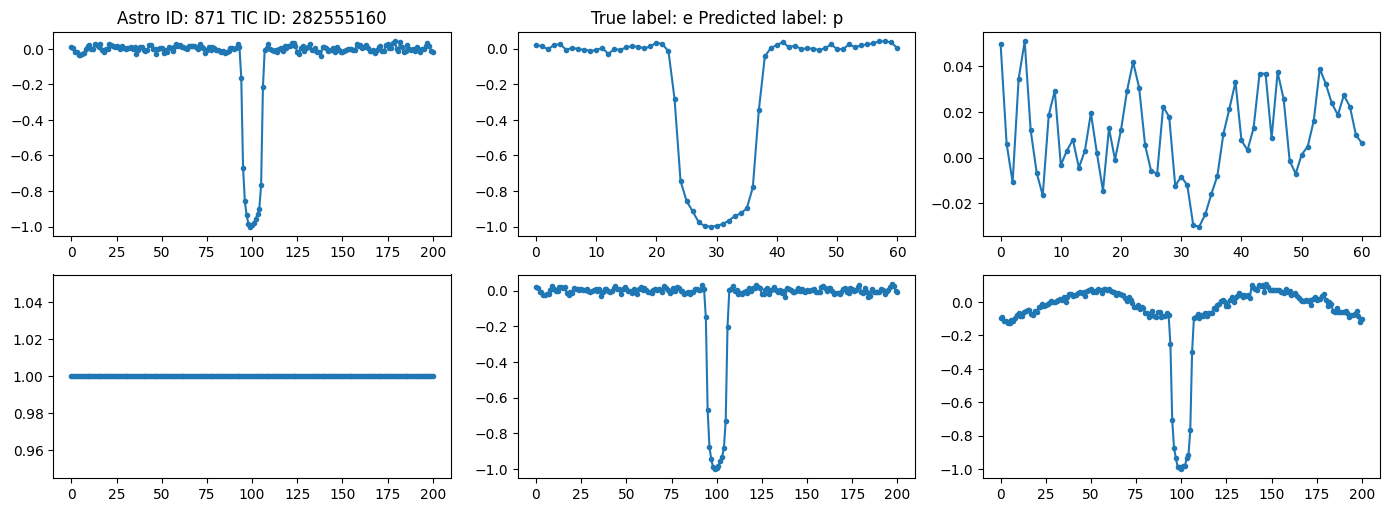

523 Astro ID: 3100 || TIC ID: 341394535 || True label: [False  True False] || Max predicted prob: [0.99 0.94 0.  ]
disp_p_pred            4
disp_e_pred            6
disp_n_pred            0
maxcount               6
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         341394535
Name: 3100, dtype: int64
duration                 : [[-0.16025585]]
period                   : [[-0.51528555]]
tmag                     : [[0.41390622]]
transit_depth            : [[0.27656835]]
n_folds                  : [[0.67121136]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[216.48225]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:49.948156: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


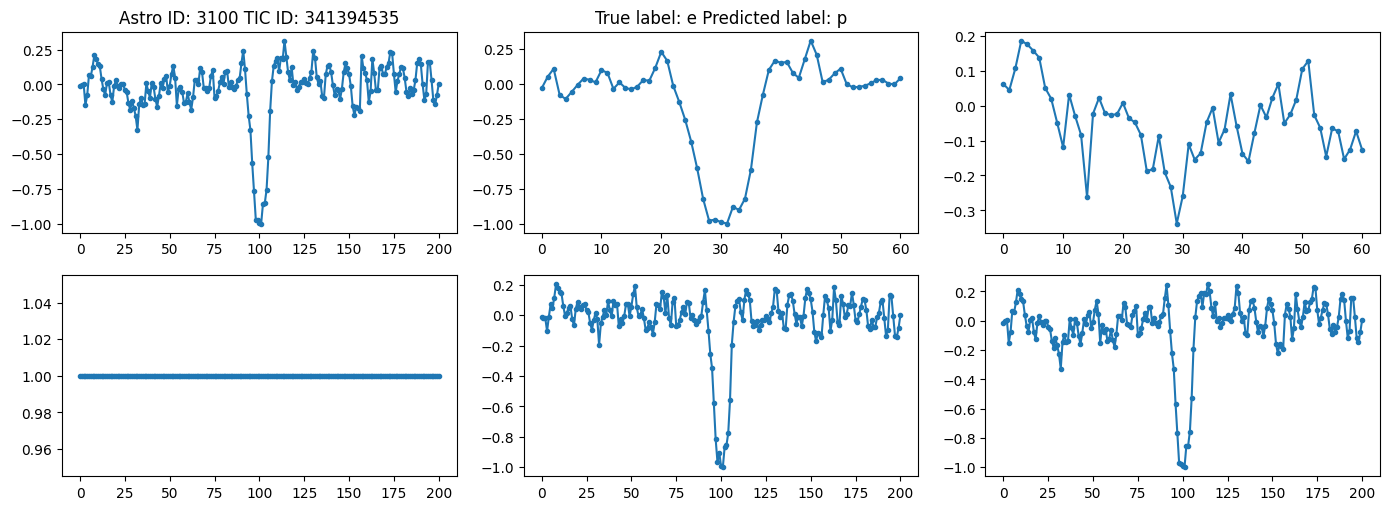

533 Astro ID: 2680 || TIC ID: 290044434 || True label: [False  True False] || Max predicted prob: [0.99 0.94 0.  ]
disp_p_pred            5
disp_e_pred            5
disp_n_pred            0
maxcount               5
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         290044434
Name: 2680, dtype: int64
duration                 : [[-0.19721852]]
period                   : [[-0.5495344]]
tmag                     : [[0.38748154]]
transit_depth            : [[0.25741652]]
n_folds                  : [[0.9672492]]
star_mass                : [[0.28092638]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.58415323]]
star_rad_est             : [[-0.22898293]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:51.008036: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


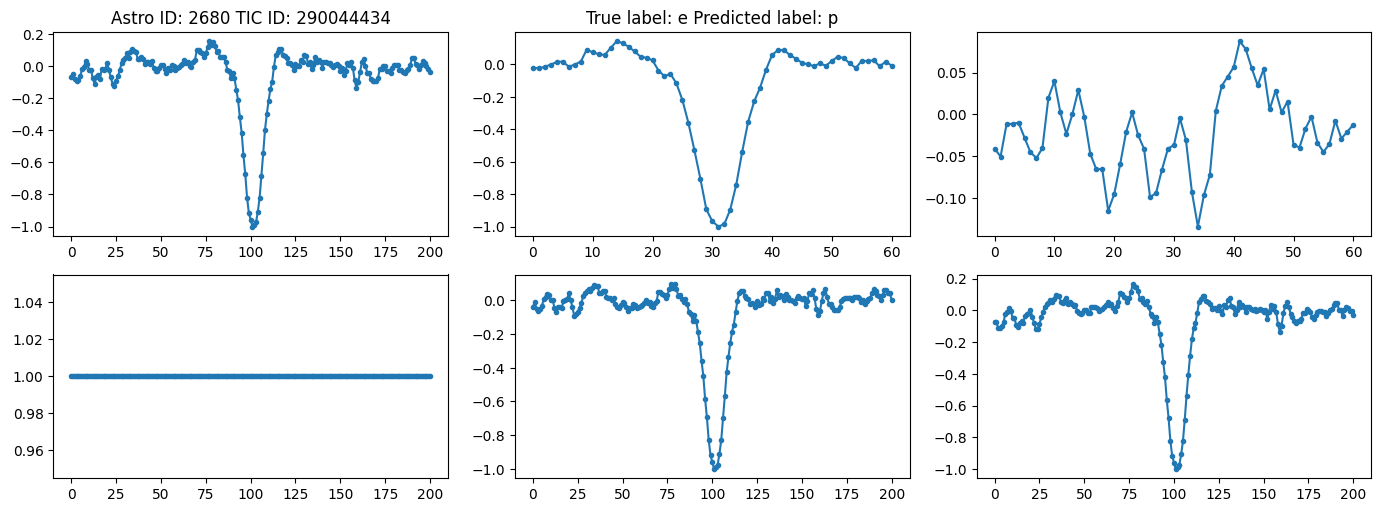

534 Astro ID: 2107 || TIC ID: 159629594 || True label: [False False False] || Max predicted prob: [0.05 1.   0.  ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 0
disp_n                 0
TIC ID         159629594
Name: 2107, dtype: int64
duration                 : [[-0.20066337]]
period                   : [[-0.10648896]]
tmag                     : [[-0.15853849]]
transit_depth            : [[0.30201396]]
n_folds                  : [[0.38907564]]
star_mass                : [[0.61217856]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.39966276]]
star_rad_est             : [[-0.19887573]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:52.038182: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


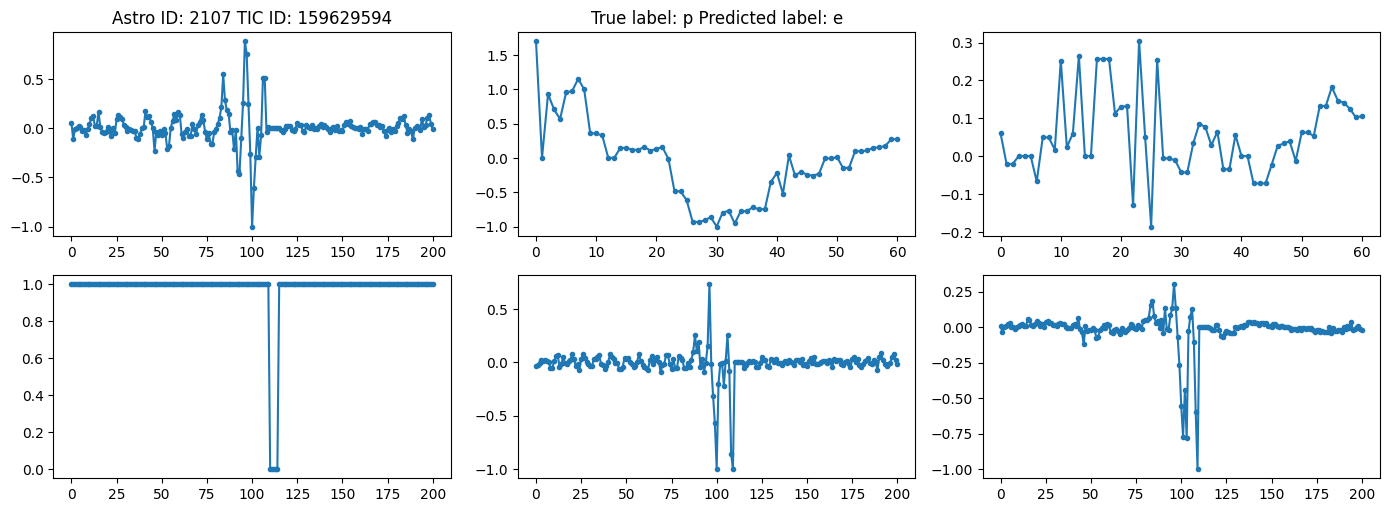

535 Astro ID: 2651 || TIC ID: 281924357 || True label: [False  True False] || Max predicted prob: [0.98 0.97 0.  ]
disp_p_pred            3
disp_e_pred            7
disp_n_pred            0
maxcount               7
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         281924357
Name: 2651, dtype: int64
duration                 : [[-0.22541387]]
period                   : [[-0.04962835]]
tmag                     : [[1.075327]]
transit_depth            : [[0.35354483]]
n_folds                  : [[0.731199]]
star_mass                : [[0.4036124]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.56203055]]
star_rad_est             : [[-0.22513197]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:53.075392: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


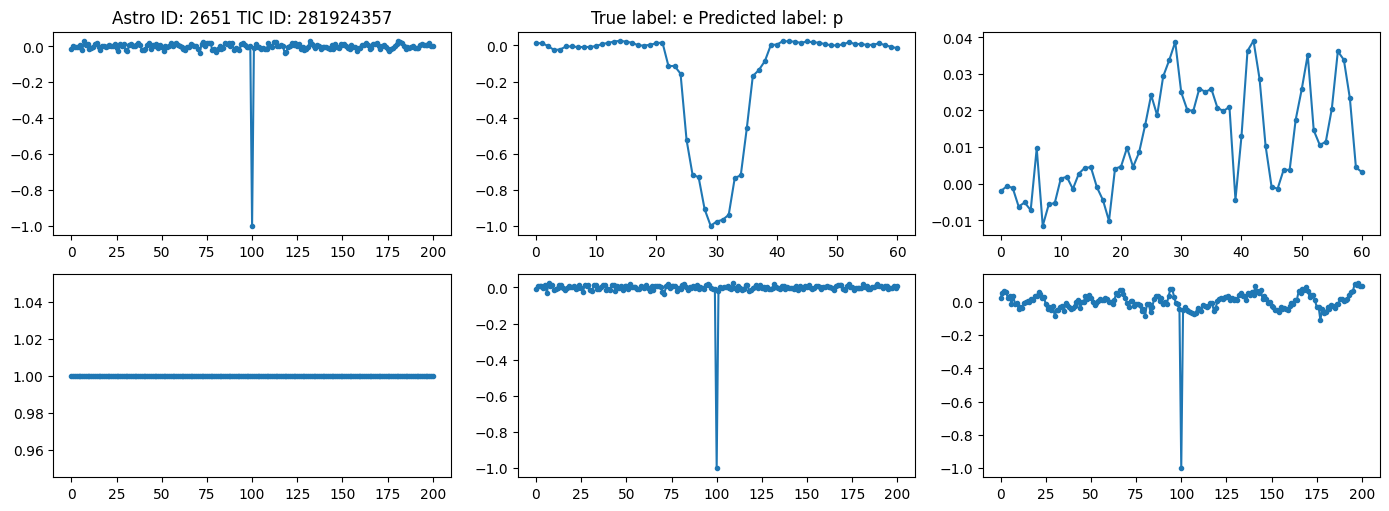

553 Astro ID: 2941 || TIC ID: 321311495 || True label: [False  True False] || Max predicted prob: [1.  0.1 0. ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         321311495
Name: 2941, dtype: int64
duration                 : [[-0.07128415]]
period                   : [[-0.51072466]]
tmag                     : [[0.9316133]]
transit_depth            : [[0.26520577]]
n_folds                  : [[0.8217263]]
star_mass                : [[0.89435637]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.47309613]]
star_rad_est             : [[-0.20861202]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:54.159996: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


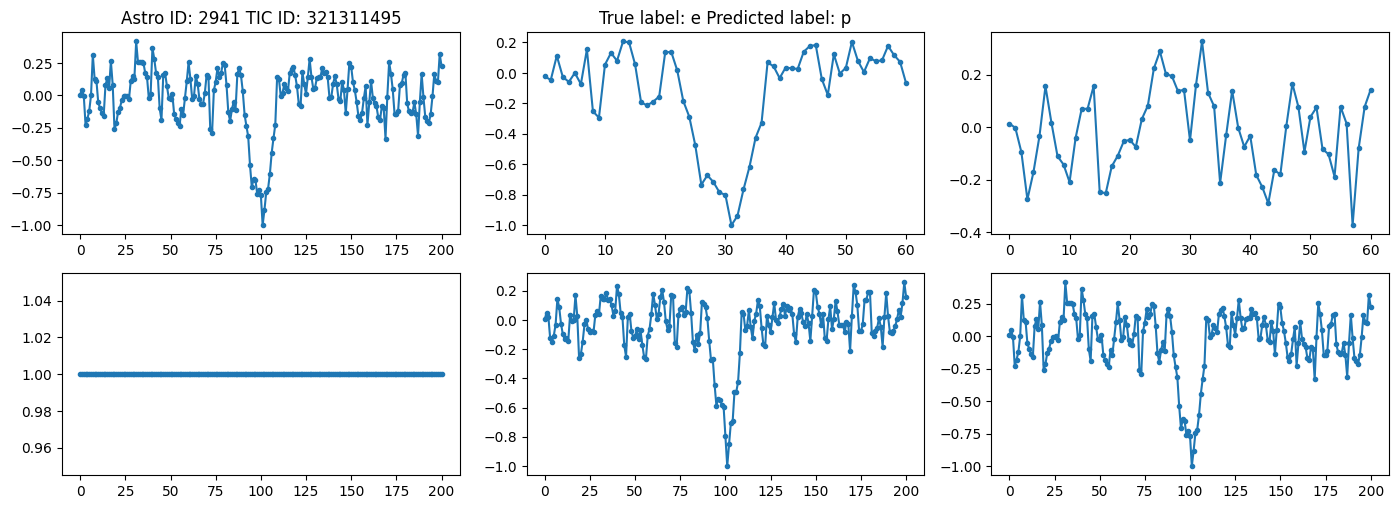

561 Astro ID: 2041 || TIC ID: 140595903 || True label: [False  True False] || Max predicted prob: [1.   0.25 0.  ]
disp_p_pred            8
disp_e_pred            2
disp_n_pred            0
maxcount               8
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         140595903
Name: 2041, dtype: int64
duration                 : [[-0.06522125]]
period                   : [[0.36229864]]
tmag                     : [[0.73822826]]
transit_depth            : [[0.25477484]]
n_folds                  : [[0.6901056]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.25445876]]
star_rad_est             : [[-0.17887698]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:55.275426: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


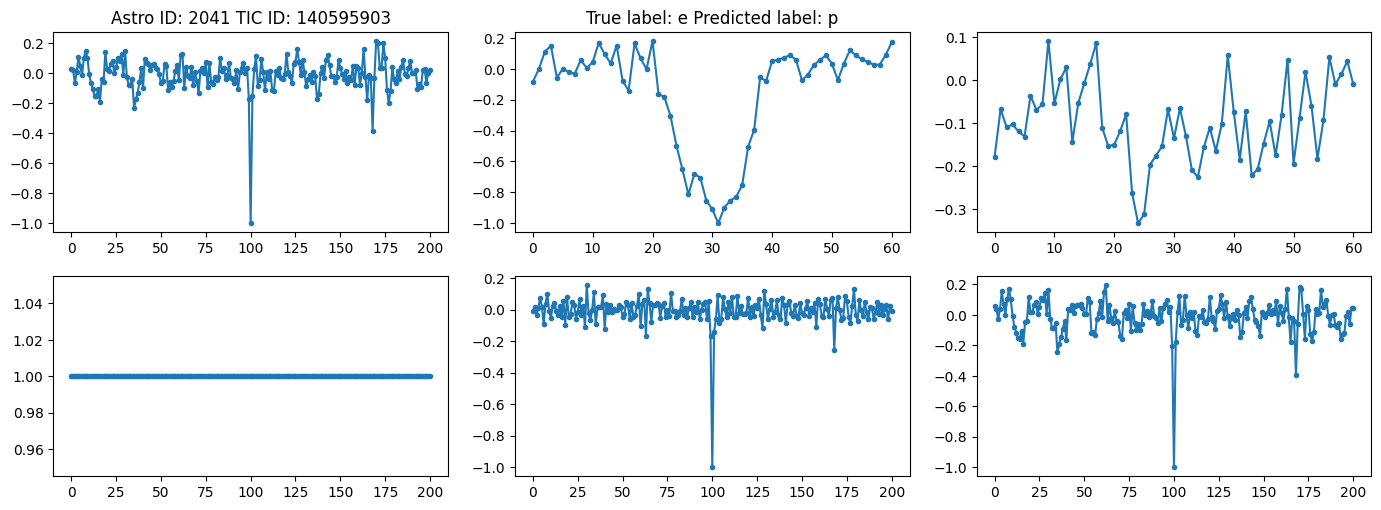

602 Astro ID: 4882 || TIC ID: 96246348 || True label: [ True False False] || Max predicted prob: [0.01 1.   0.  ]
disp_p_pred           0
disp_e_pred          10
disp_n_pred           0
maxcount             10
disp_p                1
disp_e                0
disp_n                0
TIC ID         96246348
Name: 4882, dtype: int64
duration                 : [[-0.27319452]]
period                   : [[-0.53799754]]
tmag                     : [[-0.95156467]]
transit_depth            : [[0.30812135]]
n_folds                  : [[1.0021607]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:57.103879: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


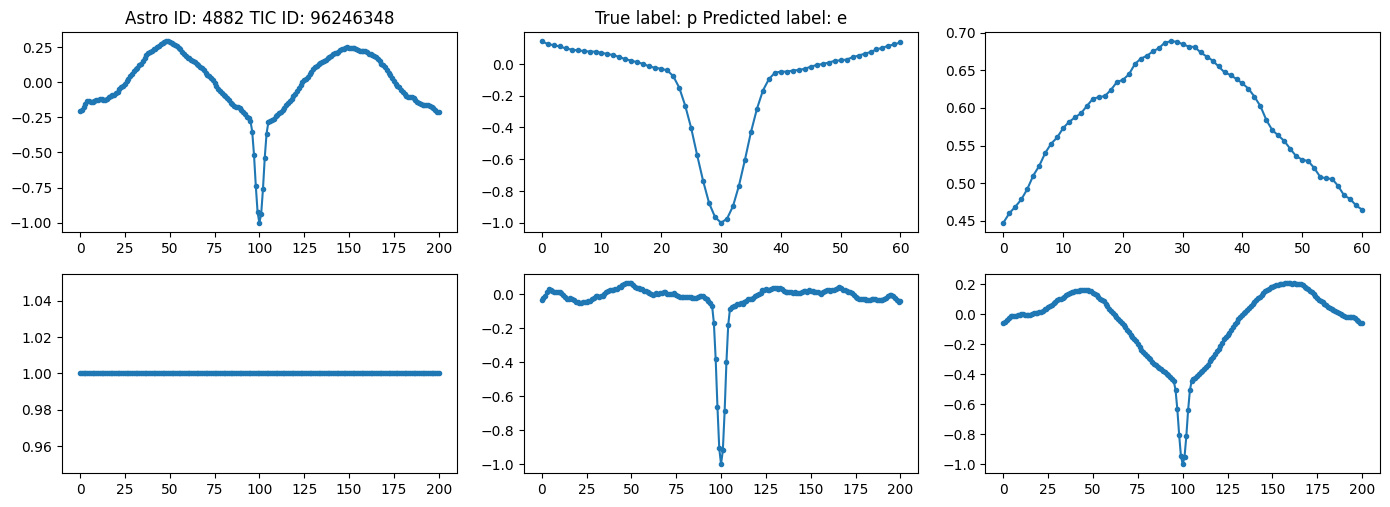

604 Astro ID: 1284 || TIC ID: 2003022879 || True label: [ True False False] || Max predicted prob: [0.13 1.   0.  ]
disp_p_pred             0
disp_e_pred            10
disp_n_pred             0
maxcount               10
disp_p                  1
disp_e                  0
disp_n                  0
TIC ID         2003022879
Name: 1284, dtype: int64
duration                 : [[-0.28356823]]
period                   : [[-0.57973725]]
tmag                     : [[-0.878835]]
transit_depth            : [[0.26553053]]
n_folds                  : [[1.0021607]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.20428635]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:41:58.200449: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


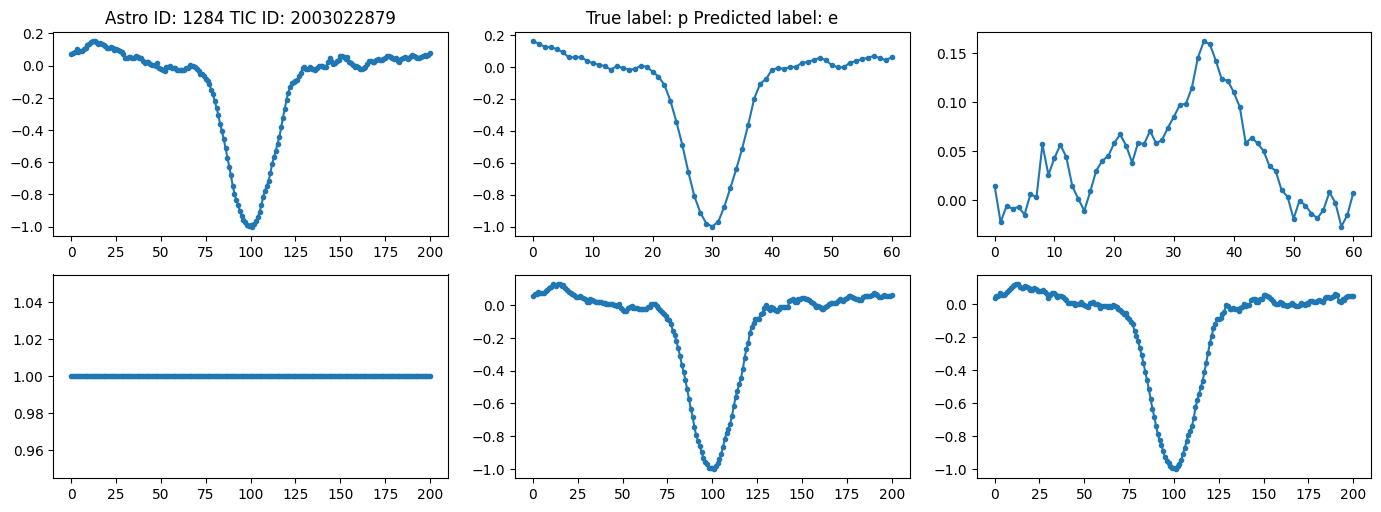

620 Astro ID: 2957 || TIC ID: 323144533 || True label: [False  True False] || Max predicted prob: [1.  0.7 0. ]
disp_p_pred            8
disp_e_pred            2
disp_n_pred            0
maxcount               8
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         323144533
Name: 2957, dtype: int64
duration                 : [[-0.15287073]]
period                   : [[-0.4520726]]
tmag                     : [[-0.10056054]]
transit_depth            : [[0.2203065]]
n_folds                  : [[0.91942453]]
star_mass                : [[0.87595344]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.46442193]]
star_rad_est             : [[-0.20765191]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:41:59.297057: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


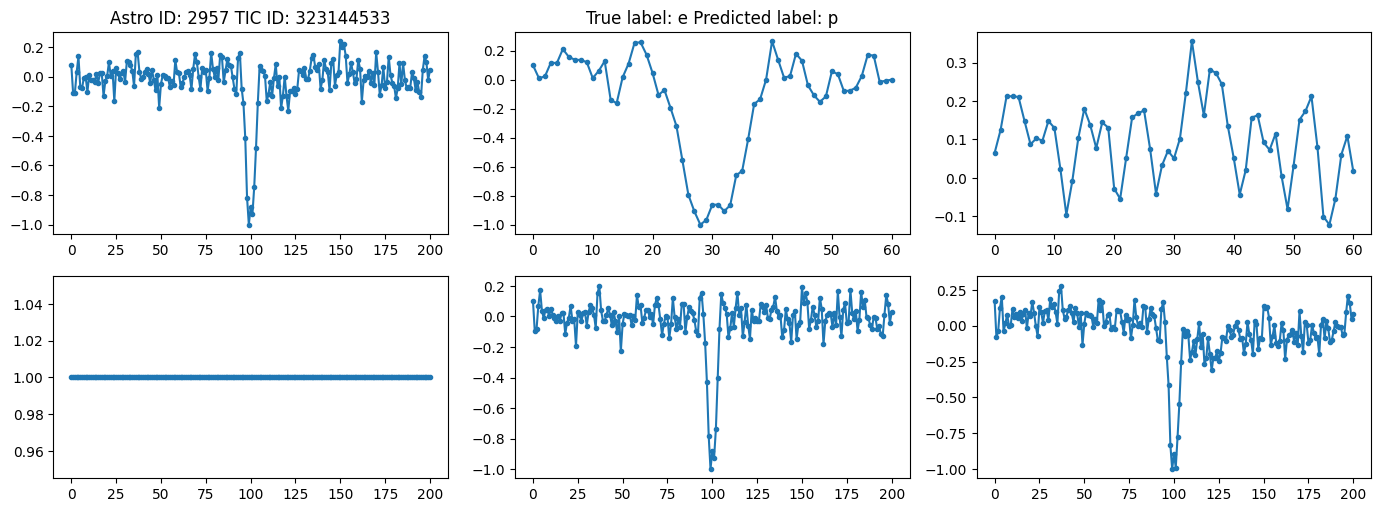

646 Astro ID: 1269 || TIC ID: 1715469667 || True label: [False False  True] || Max predicted prob: [1.   0.09 0.  ]
disp_p_pred            10
disp_e_pred             0
disp_n_pred             0
maxcount               10
disp_p                  0
disp_e                  0
disp_n                  1
TIC ID         1715469667
Name: 1269, dtype: int64
duration                 : [[-0.0225628]]
period                   : [[-0.35557157]]
tmag                     : [[-0.53880763]]
transit_depth            : [[0.32034737]]
n_folds                  : [[0.62763625]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.21561947]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:42:00.429654: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


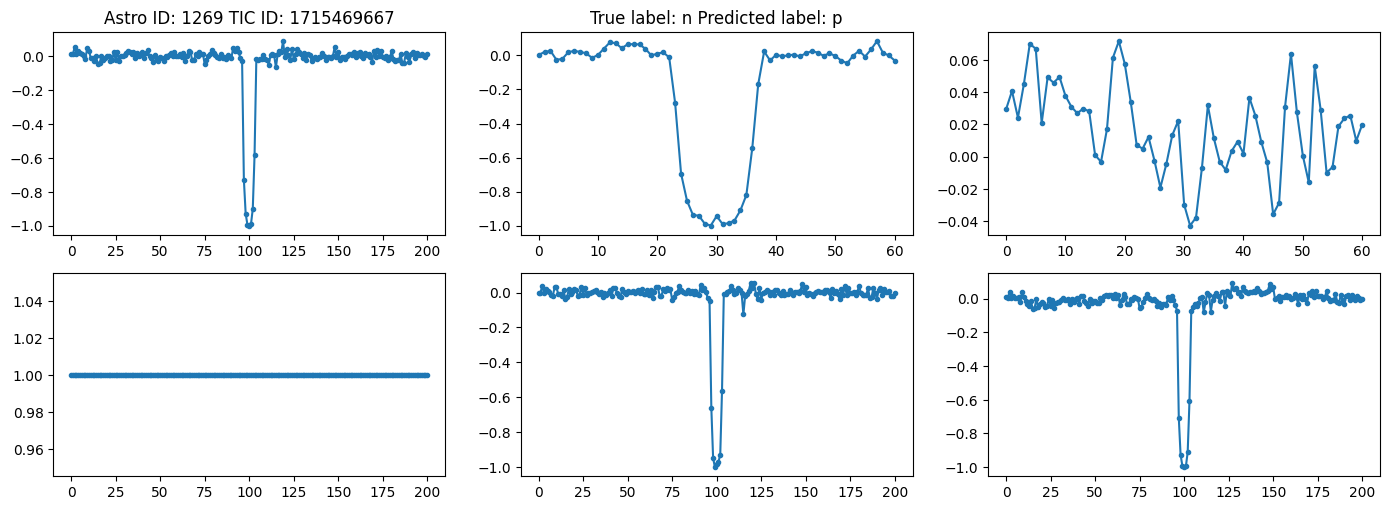

651 Astro ID: 3088 || TIC ID: 339402691 || True label: [False False False] || Max predicted prob: [0. 1. 0.]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 0
disp_n                 0
TIC ID         339402691
Name: 3088, dtype: int64
duration                 : [[-0.21553764]]
period                   : [[-0.57006127]]
tmag                     : [[0.12155466]]
transit_depth            : [[0.2249838]]
n_folds                  : [[0.9672492]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.25061882]]
star_rad_est             : [[-0.0729015]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:01.545589: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


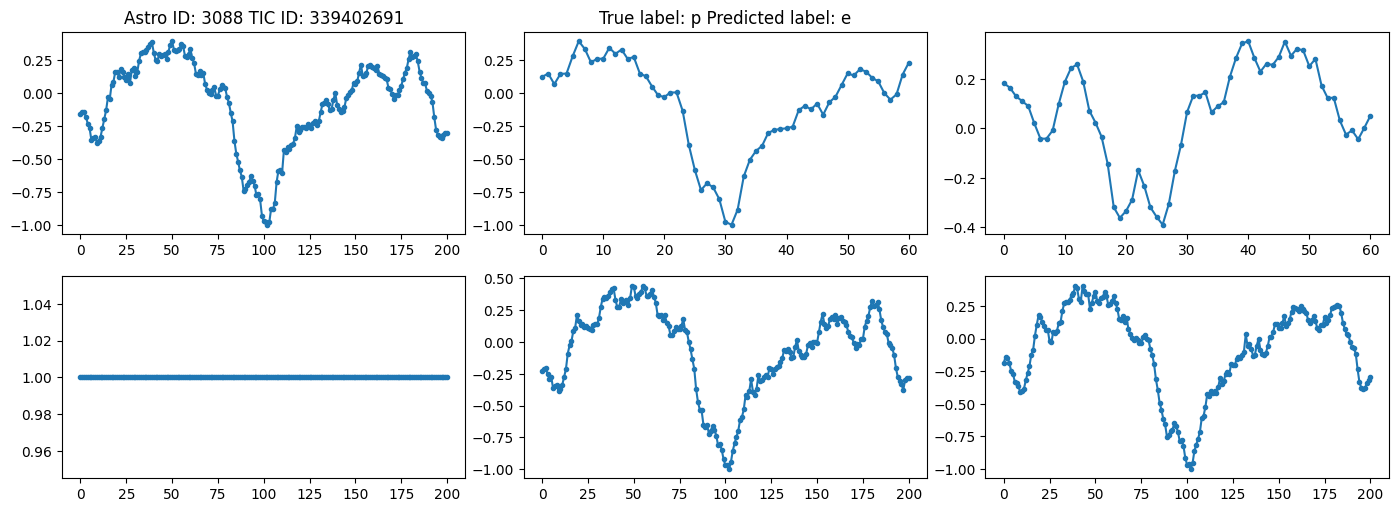

654 Astro ID: 366 || TIC ID: 82010075 || True label: [False False  True] || Max predicted prob: [0.99 0.95 0.  ]
disp_p_pred           6
disp_e_pred           4
disp_n_pred           0
maxcount              6
disp_p                0
disp_e                0
disp_n                1
TIC ID         82010075
Name: 366, dtype: int64
duration                 : [[-0.1820374]]
period                   : [[-0.44932088]]
tmag                     : [[-0.44252044]]
transit_depth            : [[0.31071737]]
n_folds                  : [[0.7074867]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[0.02348047]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:42:02.809179: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


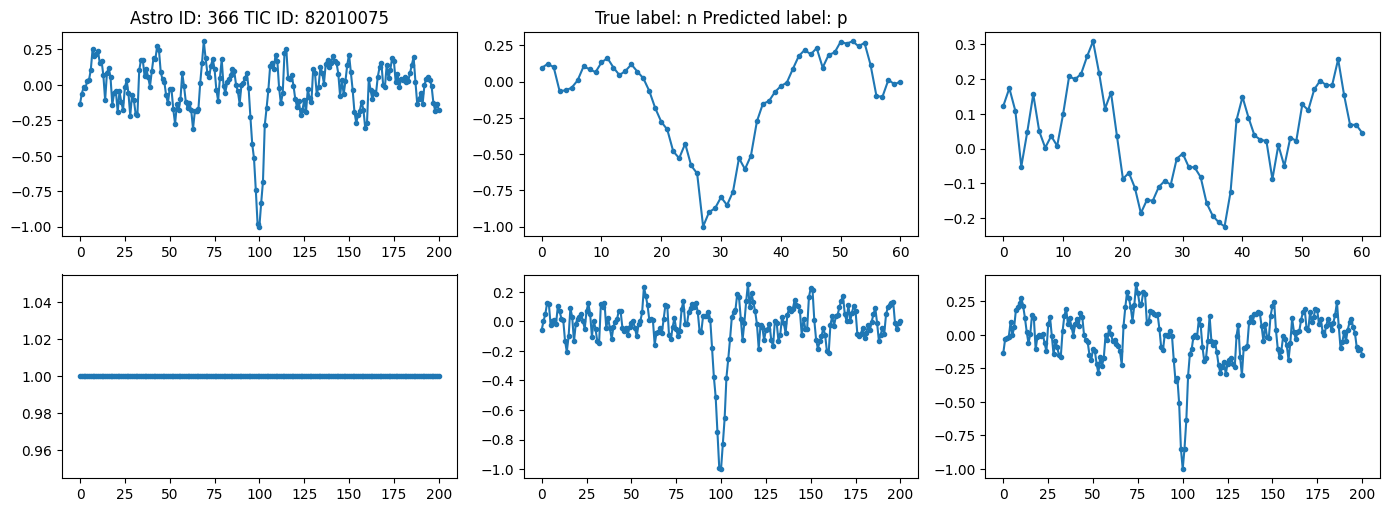

657 Astro ID: 8452 || TIC ID: 392476080 || True label: [ True False False] || Max predicted prob: [0. 1. 0.]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         392476080
Name: 8452, dtype: int64
duration                 : [[-0.18849738]]
period                   : [[-0.56435966]]
tmag                     : [[0.36198583]]
transit_depth            : [[0.33082318]]
n_folds                  : [[1.0021607]]
star_mass                : [[0.8072493]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.49822474]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:03.948076: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


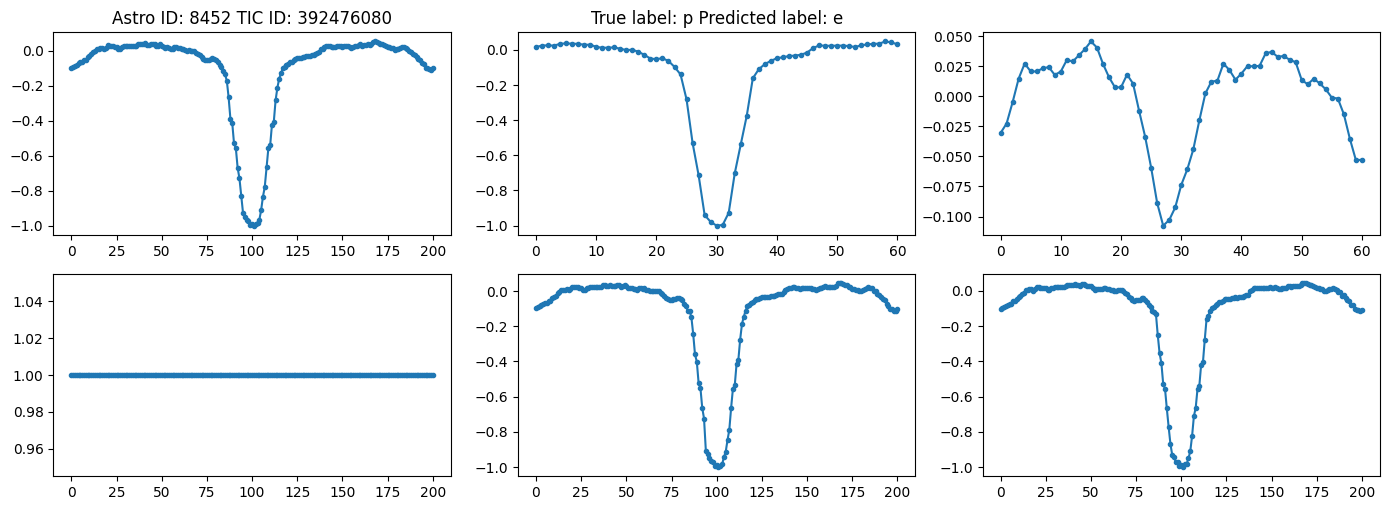

721 Astro ID: 1183 || TIC ID: 346338553 || True label: [ True False False] || Max predicted prob: [0.87 0.95 0.  ]
disp_p_pred            2
disp_e_pred            8
disp_n_pred            0
maxcount               8
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         346338553
Name: 1183, dtype: int64
duration                 : [[-0.19246611]]
period                   : [[-0.4285284]]
tmag                     : [[0.00667689]]
transit_depth            : [[0.3401173]]
n_folds                  : [[0.5]]
star_mass                : [[0.5802801]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.5226186]]
star_rad_est             : [[-0.21756777]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:05.204517: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


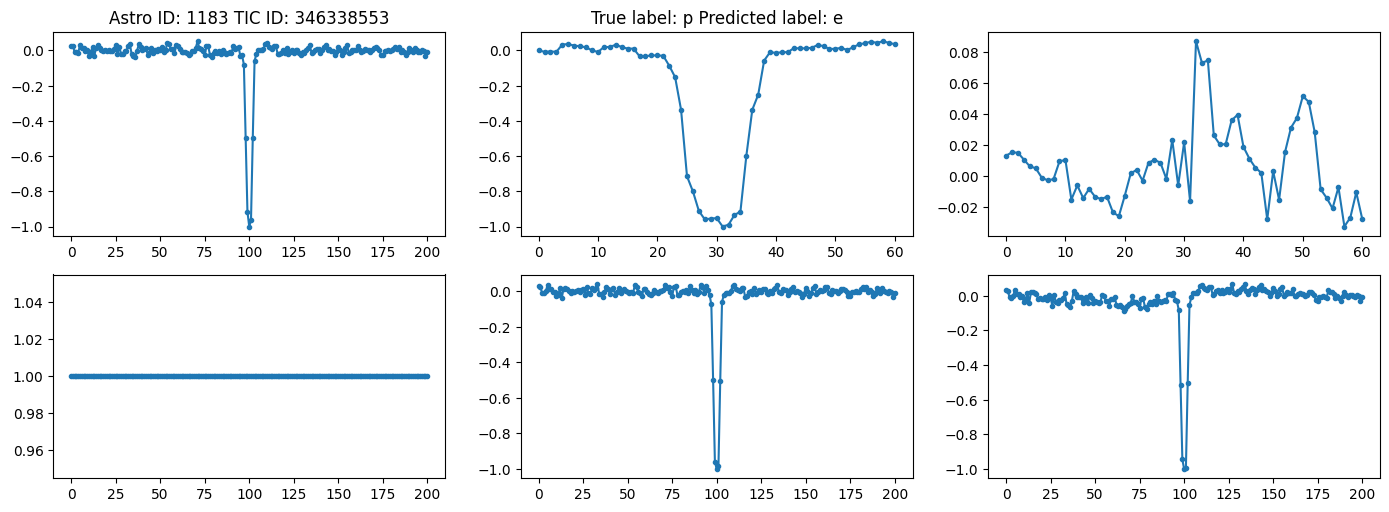

726 Astro ID: 4055 || TIC ID: 19155785 || True label: [False  True False] || Max predicted prob: [1.   0.01 0.  ]
disp_p_pred          10
disp_e_pred           0
disp_n_pred           0
maxcount             10
disp_p                0
disp_e                1
disp_n                0
TIC ID         19155785
Name: 4055, dtype: int64
duration                 : [[-0.20250158]]
period                   : [[-0.47585317]]
tmag                     : [[0.63309187]]
transit_depth            : [[0.28517845]]
n_folds                  : [[0.84062064]]
star_mass                : [[0.33368134]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.56651306]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:06.484301: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


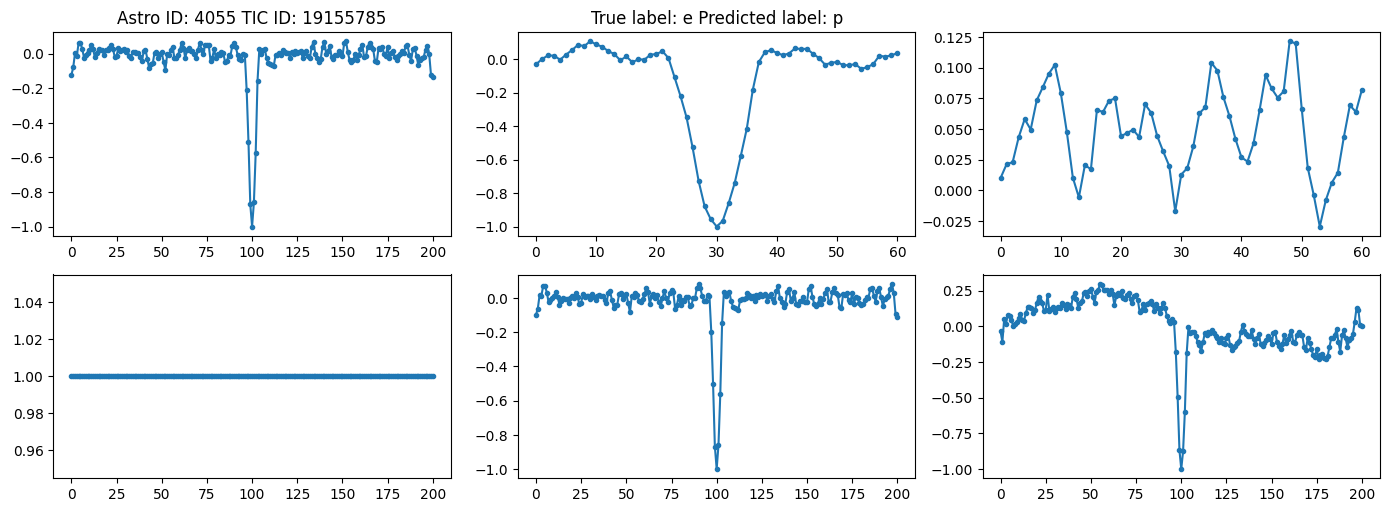

730 Astro ID: 3234 || TIC ID: 375090559 || True label: [False  True False] || Max predicted prob: [1.   0.04 0.  ]
disp_p_pred           10
disp_e_pred            0
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         375090559
Name: 3234, dtype: int64
duration                 : [[-0.16430143]]
period                   : [[-0.3941619]]
tmag                     : [[0.52440244]]
transit_depth            : [[0.2354052]]
n_folds                  : [[1.0021607]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.4926233]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:07.687860: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


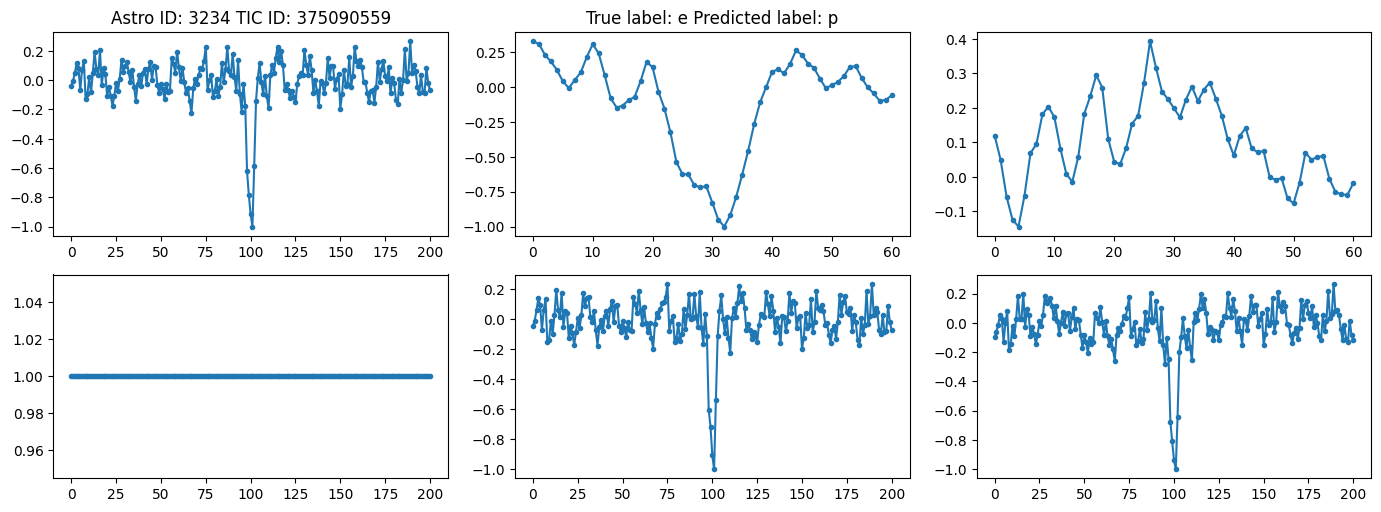

737 Astro ID: 3850 || TIC ID: 1969274810 || True label: [False  True False] || Max predicted prob: [1.   0.36 0.  ]
disp_p_pred             9
disp_e_pred             1
disp_n_pred             0
maxcount                9
disp_p                  0
disp_e                  1
disp_n                  0
TIC ID         1969274810
Name: 3850, dtype: int64
duration                 : [[0.05636085]]
period                   : [[-0.26168025]]
tmag                     : [[-0.00863586]]
transit_depth            : [[0.39963695]]
n_folds                  : [[0.55697167]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.19696891]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:42:09.271631: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


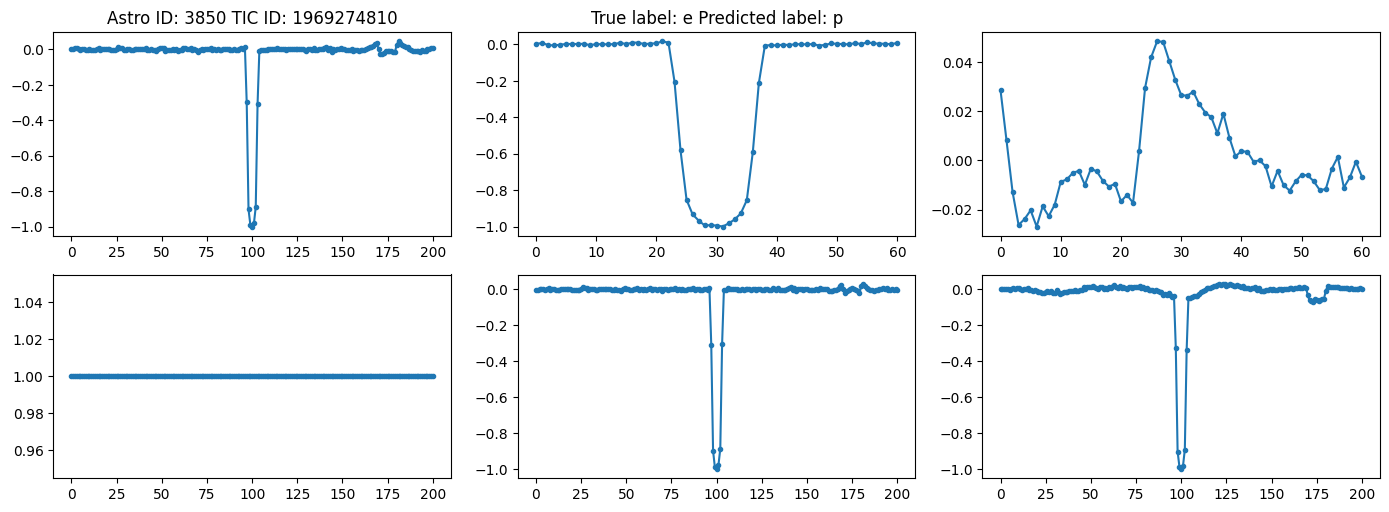

753 Astro ID: 3487 || TIC ID: 425511696 || True label: [False False False] || Max predicted prob: [0.08 1.   0.  ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 0
disp_e                 0
disp_n                 0
TIC ID         425511696
Name: 3487, dtype: int64
duration                 : [[-0.00813082]]
period                   : [[-0.18228677]]
tmag                     : [[-1.110049]]
transit_depth            : [[0.27206674]]
n_folds                  : [[0.422549]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[0.27170578]]
star_rad_est             : [[-0.05823942]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:10.563028: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


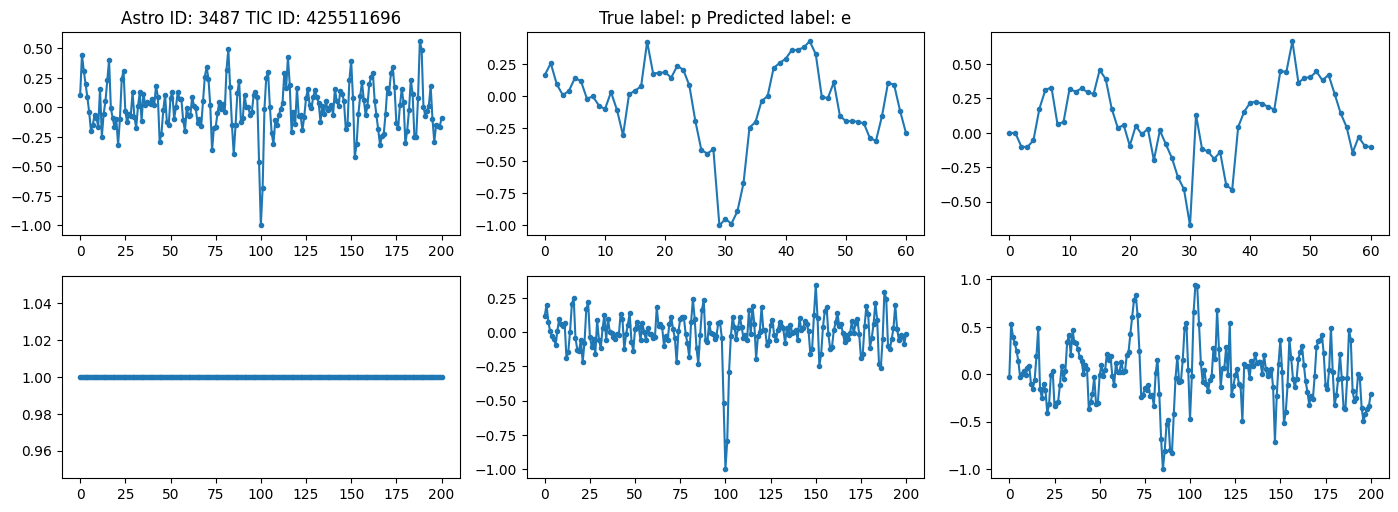

759 Astro ID: 275 || TIC ID: 49390251 || True label: [False  True False] || Max predicted prob: [0.98 0.96 0.  ]
disp_p_pred           4
disp_e_pred           6
disp_n_pred           0
maxcount              6
disp_p                0
disp_e                1
disp_n                0
TIC ID         49390251
Name: 275, dtype: int64
duration                 : [[-0.27829263]]
period                   : [[-0.5444096]]
tmag                     : [[1.1367766]]
transit_depth            : [[0.28303775]]
n_folds                  : [[0.8360489]]
star_mass                : [[0.7103274]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.31831512]]
star_rad_est             : [[-0.19563372]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:11.778240: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


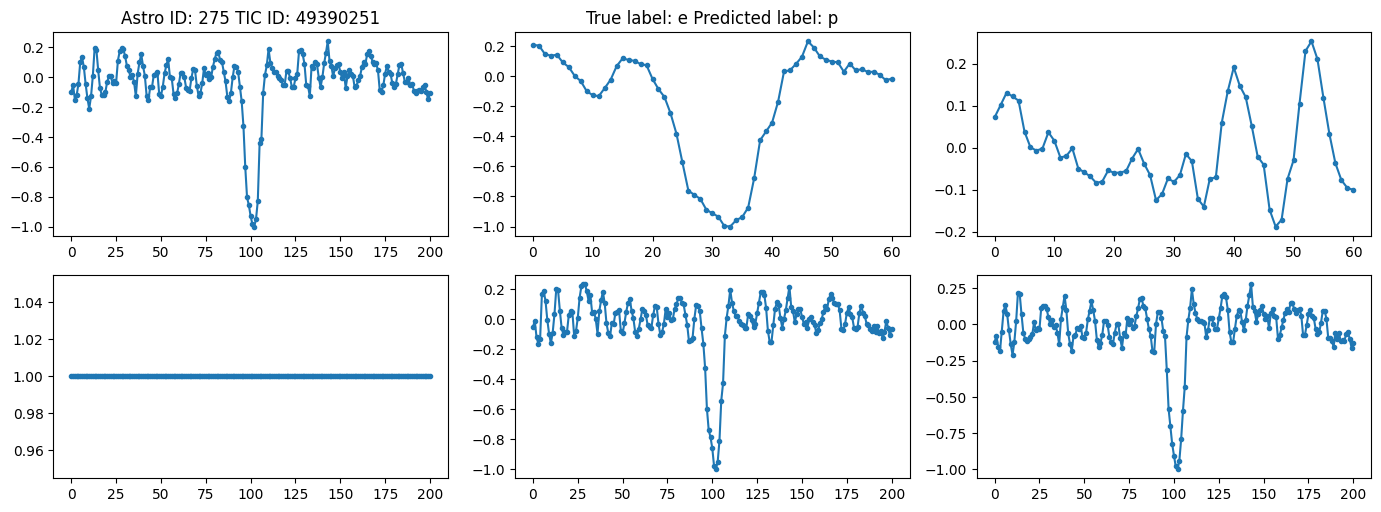

764 Astro ID: 2608 || TIC ID: 273888864 || True label: [False  True False] || Max predicted prob: [0.99 0.83 0.  ]
disp_p_pred            6
disp_e_pred            4
disp_n_pred            0
maxcount               6
disp_p                 0
disp_e                 1
disp_n                 0
TIC ID         273888864
Name: 2608, dtype: int64
duration                 : [[0.02496312]]
period                   : [[-0.38035122]]
tmag                     : [[0.6972207]]
transit_depth            : [[0.29226083]]
n_folds                  : [[0.6393768]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.2422303]]
star_rad_est_present     : [[0.]]
star_rad_present         : [[0.]]


2024-02-26 16:42:13.019984: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


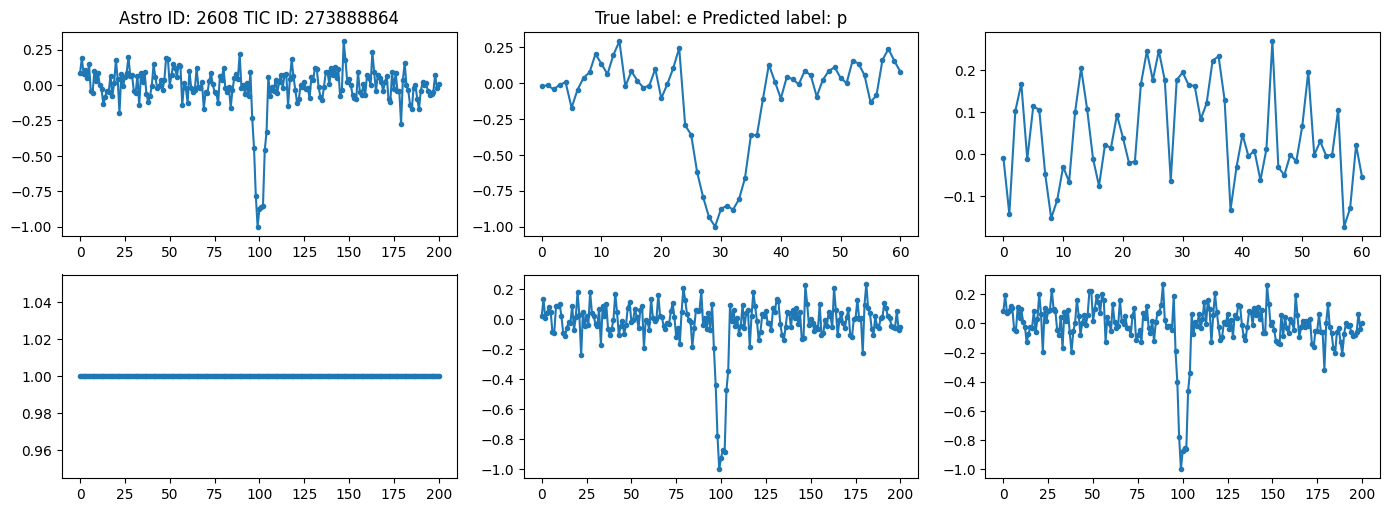

775 Astro ID: 2616 || TIC ID: 275758701 || True label: [ True False False] || Max predicted prob: [0.89 0.94 0.  ]
disp_p_pred            1
disp_e_pred            9
disp_n_pred            0
maxcount               9
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         275758701
Name: 2616, dtype: int64
duration                 : [[-0.24670446]]
period                   : [[-0.5459331]]
tmag                     : [[-0.02857858]]
transit_depth            : [[0.3063768]]
n_folds                  : [[0.94881356]]
star_mass                : [[-0.9091278]]
star_mass_present        : [[0.]]
star_rad                 : [[-0.663398]]
star_rad_est             : [[-0.17884219]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[0.]]


2024-02-26 16:42:14.252669: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


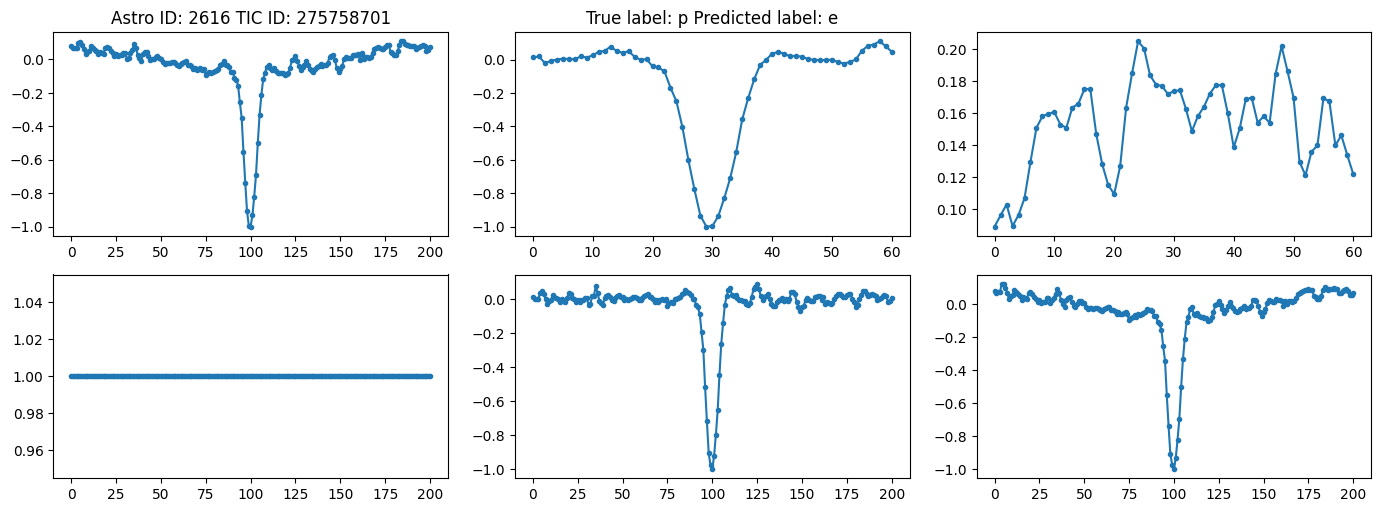

779 Astro ID: 3345 || TIC ID: 391241402 || True label: [ True False False] || Max predicted prob: [0.1 1.  0. ]
disp_p_pred            0
disp_e_pred           10
disp_n_pred            0
maxcount              10
disp_p                 1
disp_e                 0
disp_n                 0
TIC ID         391241402
Name: 3345, dtype: int64
duration                 : [[-0.01066163]]
period                   : [[-0.34566978]]
tmag                     : [[-0.09196033]]
transit_depth            : [[0.2533075]]
n_folds                  : [[0.62763625]]
star_mass                : [[2.1089478]]
star_mass_present        : [[1.]]
star_rad                 : [[-0.3952839]]
star_rad_est             : [[-0.1985248]]
star_rad_est_present     : [[1.]]
star_rad_present         : [[1.]]


2024-02-26 16:42:15.534683: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


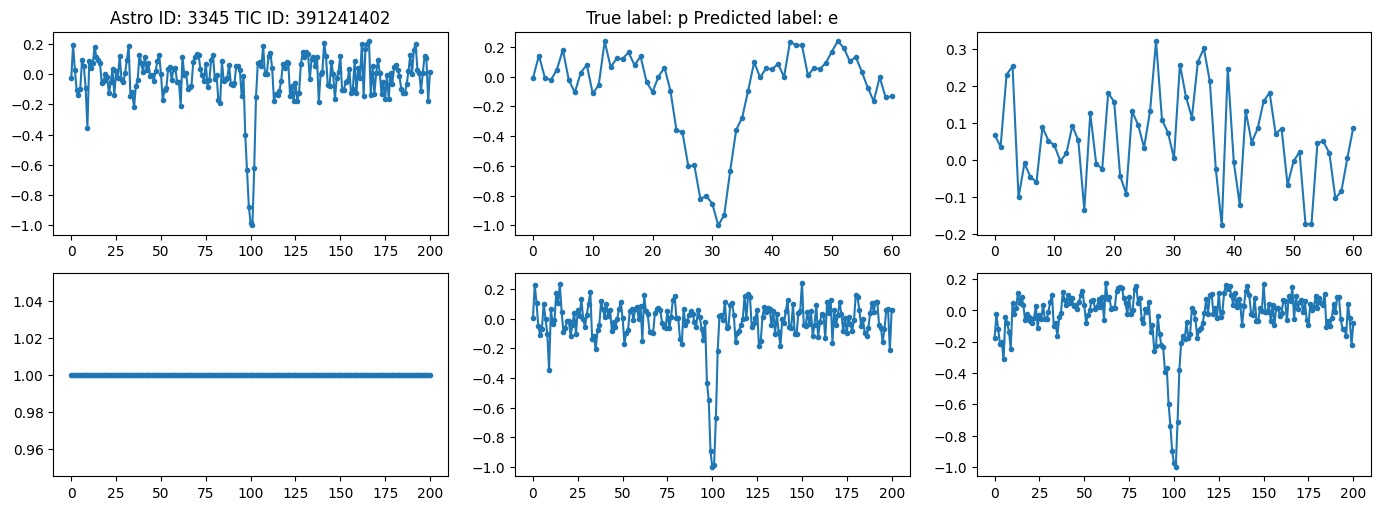

In [40]:
# Examine misclassifications
for i, astro_id in enumerate(astro_id_preds):
    if ytrue[i].argmax() != ypred[i].argmax():
        print(i, "Astro ID:", astro_id, "|| TIC ID:", tic_id_preds[i], "|| True label:", ytrue[i], "|| Max predicted prob:", ypred[i].round(2))
        print(pl.loc[astro_id])

        fig, axes = plot_ds_tce(ds, astro_id)
        axes[0, 0].set_title(f"Astro ID: {astro_id} TIC ID: {tic_id_preds[i]}")
        axes[0, 1].set_title(f"True label: {labels[ytrue[i].argmax()]} Predicted label: {labels[ypred[i].argmax()]}")
        plt.show()
        